# Algorithmic toolboxes for the study of the filmic past -- on newsreels & AI

In [ ]:
import csv
import http.server
import socketserver
import sys
import threading
import time
from collections import defaultdict
from itertools import pairwise
from pathlib import Path

import cv2
import ipywidgets as widgets
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import IFrame, Image, Video, display
from journal_digital import Corpus
from plotly import colors
from plotly.subplots import make_subplots

root = Path(".")
data = root / "script"

# Checking if rendered locally. Used to render .gif
#  .mp4 will be shown when rendered in binder
local = "m36" in sys.prefix.split('/')

### Mathias Johansson [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0002-3338-0551) 
Department of Arts and Cultural Sciences, Lund University

 ### Robert Aspenskog [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0009-0005-4720-3352) 

Department of Cultural Sciences, Linnaeus University 

Department of Arts and Cultural Sciences, Lund University


### Johan Malmstedt [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-5207-4296) 

GRIDH, University of Gothenburg 

metaLAB, Harvard University

### Emil Stjernholm [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-9871-5191) 
Department of Communication, Lund University

### Pelle Snickars [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/0000-0001-5122-1549) 
Department of Arts and Cultural Sciences, Lund University

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©AUTHORS. Published by De Gruyter in cooperation with the University of
Luxembourg Centre for Contemporary and Digital History. This is an Open
Access article distributed under the terms of the
[Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


Media History, Newsreels, Multimodal Analysis, Digital humanities, Film studies

Using a computational film studies framework, this article examines a major
Swedish newsreel archive—the Journal Digital collection—deploying among others:
signal
archaeology, named entity recognition, and geocoding. We also apply a broad
algorithmic toolbox to convert both intertitles and speech 
into a transcribed and timestamped corpus of the entire collection. Our basic
idea is to construct a number of mid-sized datasets from the Journal Digital
collection in different modalities, and proceed with an examination using
various approaches. Consequently, our intention is to increase the scholarly
capacity of media historical sources, while at the same time critically
scrutinising AI and algorithmic toolboxes for the multimodal study of the past. 

In [ ]:
display(Image("./media/img1.png", width=1000))

In [ ]:
metadata = {
  "jdh": {
    "module": "object",
    "tags": ["figure-Gunnar-*"],
    "object": {
      "type": "image",
      "type": "image",
      "source": [
        "Gunnar Skoglund (1899–1983)—once hailed in the Swedish press "
        'as a "speaking artist"—did hundreds of voice-over for the '
        "national SF newsreel. At the time, his voice was arguably "
        "the most familiar in Sweden. Skoglund was also a skilled "
        "director, actor and producer of some thirty short films, "
        "dating from the late 1920s to the 1950s."
      ],
    },
  }
}
display(Image("./media/skoglund.png", width=1000), metadata=metadata)

## Introduction

At the archive of Swedish Television (SVT) and Radio Sweden (SR) there are some
thirty volumes of so-called speaker lists used for voice-over in the production
of the national SF newsreel–_Svensk Filmindustris Veckorevy_ (_Svensk
Filmindustri’s Weekly Review_). During the 1960s, the film company Svensk
Filmindustri (SF) sold its non-fiction film and newsreel archive to public
service radio and tv. The making of newsreels, however, had begun already in
1914, when SF started producing a weekly newsreel in a similar fashion and
format as in other countries. These newsreels were nationally distributed in
dozens of copies across Sweden; during the silent era they naturally included
textual intertitles. From 1932 and onwards sound was added; the preserved
voice-over scripts in the SVT and SR vaults hence range from 1932 until 1959.
These lists were as detailed as plentiful; today each volume in the archive
includes some 150 manuscripts, making the total number of speaker lists to
approximately 5,000. In a literal sense they were production manuscripts,
almost all contained handwritten edits, and small commentary. All likely they
served as the final manuscript for the person who did the voice-over commentary
in the film studio, describing the length in seconds when text should be
spoken, while also indicating what type of shot the edited newsreel depicted
during each particular sequence.

In [ ]:
display(
  Image("./media/img2.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-first-newsreel-*"],
        "type": "image",
        "source": [
          "The first episode in a SF newsreel from March 1933 "
          "depicted the Swedish frigate Vanadis, a naval training "
          "ship. The commentary was read by "
          "[Gunnar Skoglund](#figure-Gunnar-*), and as is evident "
          "from the preserved speaker list, it was meticulous, "
          "customized in seconds, and almost identical to what was "
          "heard in the film. In English translation Skoglund "
          'rapidly announced: "Since the beginning of the 20th '
          "century, the venerable frigate Vanadis has been anchored "
          "at Skeppsholmen in Stockholm as a lodging and training "
          "ship. In its disrigged hull, two generations of sailors "
          "have slept the warrior's heavy and well-deserved sleep in "
          "hammocks. Lying in a bunk it is called in sailor's "
          "language, but it is not quite the same as sleeping in a "
          "bed at home. If nothing else, the alarm clock is a little "
          'louder here"— trumpet immediately!'
        ],
      },
    }
  },
)

For digital media historians, trying to analyse 
speaker lists from the SF archive as a textual dataset poses challenges. 
If one, for example, uploads an
archival sample of a speaker lists to an AI-powered engine such as Perplexity,
with the prompt to OCR a particular section, the result is not particularly
impressive. The AI-model does a fair job with all typed Swedish text, but fails
with handwritten notes as well as words that have been manually crossed out.
Occasionally, Swedish words and letters even turn into Cyrillic script: "8 sek.
Strömmen. Alltsedan mitte av 1890-talet karxxіях кирракX Momenxxxxsixxxkxxmxx".
Trying to work with the SF speaker lists in digitised form is hence scholarly
difficult. These lists exhibit many of the common traits that archival
documents often encompass; combined typed and handwritten text with corrections
often hinders OCR, and structuring of data in correct ways.

AI hallucination of a Swedish voice-over manuscript into Russian can of course also be
seen as an example of how large language models generate information that is both
historically inaccurate—and even fabricated. By now it is well known among
historians that LLM's often hallucinate about the past, particularly when more
specific questions are posed. While it is true that generative AI does give apt
textual answers, such models have repeatedly been critiqued when it comes to
producing historical images. Fabian Offert has stressed that models such as
CLIP or DALL-E find themselves in "a triple bind: they suffer from syntactic
invariability in the case of _generally_ historical prompts, semantic arbitrarity
in the case of _specifically historical_ prompts, and superficial, corporate
censorship that affects both" 
<cite id="wt62q"><a href="#zotero%7C22783102%2FUK5SM8C2">(Offert 2023)</a></cite>. 
The latter is, of course, particularly problematic. Nearly all forms of
generative AI are circumscribed by commercial constraints; encoded values are
neither epistemic nor scholarly.

Despite these AI shortcomings regarding the past, in this article we aim to
analyse the SF archive—today usually referred to as the Journal Digital
collection—with a diverse set of algorithmic tools. Given our initial
discussion, we have however refrained from digitising textual sources (such as
the preserved SF speaker lists), and instead focused on the audiovisual
material _per se_. Using a computational film studies framework 
<cite id="oan5f"><a href="#zotero%7C22783102%2FH4XMMWYS">(Oiva et al. 2024)</a></cite>, 
this article hence examines the Journal Digital collection
deploying both signal archaeology, named entity recognition and geocoding. We
will also apply a small algorithmic toolbox developed for this article, speficically
_stum_ and _SweScribe_. Using these tools we have converted all intertitle-texts
and all speech into a time-aligned corpus we call Journal Digital Corpus
<cite id="emq9i"><a href="#zotero%7C22783102%2F5LZCK9F3">(Aspenskog, Johansson, and Snickars 2025)</a></cite>.

In [ ]:
display(
  Image("./media/vid1.gif") if local else Video("./media/vid1.mp4"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "tags": [
        "figure-composition-*",
      ],
      "object": {
        "type": "image",
        "source": [
          "It is indeed difficult to visualise a dataset with "
          "thousands of nonfiction films, still a small _quick and "
          "dirty_ compilation of 28 silent films (from the 1920s) "
          "gives an impression of the vivid depiction of Swedish "
          "society—and modernity—that the SF archive encompasses."
        ],
      },
    }
  },
)

Our work is rooted in the research project Modern Times 1936, that explores
what software sees, hears and perceives when technologies for pattern
recognition are applied to media historical sources. Within this research
project we have prior been interested in the the historical gaze of generative
AI
<cite id="kh5xp"><a href="#zotero%7C22783102%2F7HB6GAHN">(Stjernholm, Eriksson, and Mohammadi Norén 2025)</a></cite>,
algorithmic scaling of early cinema on YouTube
<cite id="iunbf"><a href="#zotero%7C22783102%2FTV37XT5P">(Stjernholm and Snickars 2024)</a></cite>,
and techniques for assessing photorealism in synthetic images
<cite id="ktmd7"><a href="#zotero%7C22783102%2FVL4UHIWF">(Eriksson 2024)</a></cite>.
As Charlie Chaplin in _Modern Times_ (1936) once struggled to comprehend an
industrialised world with giant machines, a common denominator in our research
project has been to explore how computational methods can help us understand
modernity in new ways. In this article, the idea is hence to construct a number
of mid-sized datasets from the Journal Digital collection in different
modalities, and proceed with an examination using various computational
approaches. Consequently, our intention is to increase the scholarly capacity
of media historical sources, while at the same time critically scrutinising AI
and algorithmic toolboxes for the study of the past.

In [ ]:
display(
  Image("./media/img3.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-SF-facilities-*"],
        "type": "image",
        "source": [
          "The Swedish SF film company had its production facilities "
          "with studio and film laboratory located in the so called "
          "Film-City (Filmstaden) in the suburb of Råsunda "
          "(north of Stockholm), from 1920 until 1969. As is evident "
          "from these late 1920s and 1930s photographs, the "
          "production of newsreels was a practical craft; it "
          "involved editing, cleaning, and copying film, as well as "
          "synchronising added sound. The film itself was "
          "nitrate-based celluloid, known both for its high image "
          "quality—and dangerous flammability. Illustrations from "
          "the Swedish Film Institute and the Swedish National "
          "Museum of Science and Technology. "
        ],
      },
    }
  },
)

## Biography of a film collection

During the late 1950s, the film manuscript writer Gardar Sahlberg (1908–1983)
started to take an increased interest in the film archive at Svensk
Filmindustri (SF). At the time, however, the company archive of nitrate films,
such as newsreels and short films, was in dire need of restoration (and
preservation). Most of the oldest footage was filmed by cinematographers from
Swedish Biograph, a company that in 1919 merged into SF
<cite id="e3b9w"><a href="#zotero%7C22783102%2F6APYGVMY">(Olsson 2022)</a></cite>.
From the beginning of the 1920s until the 1960s, SF had been the leading
producer of newsreels, educational cinema, and other types of useful films,
distributed in both theatrical and non-theatrical venues 
<cite id="zytto"><a href="#zotero%7C22783102%2FBQLCIUEW">(Stjernholm and Florin Persson 2019)</a></cite>.
As a way to finance a reconstruction and improvement of the
SF archive, Sahlberg and SF decided to produce historical compilation films
based on the same old film material. In 1961, for example, the documentary _När
seklet var ungt_ (_When the century was young_) had its premiere. Critics
endorsed the film—but audiences did not. Instead, SF started negotiations with
SR, which at the time was also responsible for national public
service television. During the winter of 1964, it was announced that SR had
acquired the whole newsreel archive from SF; one million meters of film dating
from 1897 to 1960 was purchased 
<cite id="jkgmd"><a href="#zotero%7C22783102%2FBNUCIK7T">(Snickars 2024)</a></cite>.
The deal was explosive, not only because of the number of preserved nitrate
prints; the SF archive would now find a novel audience in another medium:
television.

In [ ]:
display(
  Image("./media/img4.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-seklet-*"],
        "type": "image",
        "source": [
          "The compilation film, _När seklet var ungt_ "
          "(_When the century was young_) from 1961, was "
          "based on the oldest nonfiction films and "
          "newsreels within the SF archive. In February "
          "1962, the director Gardar Sahlberg stated in "
          "a letter to the national archivist in Sweden, "
          "that the intention of the film was to "
          'show "the qualitatively impressive archival film material" '
          "to a culturally interested audience. "
          "At SF we had the belief, he admitted, "
          "that curiosity of this type of older films "
          'would be so great "that the money received '
          "from the box office would make it possible "
          "to go ahead, and finance the renewal of "
          'the [SF] archive". But unfortunately that '
          "was not the case—despite excellent reviews. "
          "When the film was shown "
          '"in a few places in the countryside, there was no audience," '
          "he sadly concluded."
          ''
        ],
      },
    }
  },
)

As part of the deal, Sahlberg and a few colleagues at SF were hired by SR to
work with safeguarding the SF archive. During the 1960s and 1970s, the archive
was preserved, duplicated, catalogued, and subsequently re-used in numerous
television programs. In fact, SR made a remarkable cultural-historical effort
in saving this film archive. From the old nitrate prints, Sahlberg had three
different film materials made: a master copy on 35 mm (for preservation), a
duplicate negative on 35 mm to obtain new copies, and a 16 mm display copy for
program producers at SR. Sahlberg also took personal responsibility to
catalogue the entire SF archive, manual work he basically did on his own.
Notably, all films from SF were catalogued under a specific SF number; SF2001
for example was the oldest film in the archive, dating from 1897. Since SR took
excellent care of these films, the company was able to acquire other film
collections as well. Some 400 films were purchased from Kinocentralen in the
mid 1960s, a company that had produced short and industrial films from the
early 1920s. Other similar films were donated to SR from, for example, the
Swedish Film Library (Filmhistoriska Samlingarna), the Salvation Army Sweden,
the Stockholm City Museum, and the film archive at the Swedish State Railways
(SJ)—the latter collection contained almost two hundred nonfiction films
produced by SJ between 1920 and 1960. SR also bought the newsreel Nuet 
produced by the film company Nordisk Tonefilm during a few years in the mid
1950s 
<cite id="9dljg"><a href="#zotero%7C22783102%2FDSU6R48K">(Asp 2014)</a></cite>.
Finally, in 1969 SR also decided to acquire all short films produced by SF, a
deal that made the entire collection at SR amount to more than five thousand
films. As a consequence, the initial SF archive came to contain a range of
different types of documentary film, with different provenances. It should be
noted, however, that the rationale behind all these film acquisitions was the
potential usage of old films in new tv-programs. Still, SR was also interested
in developing a sales organisation for tv-programs, with film rights as a
prospective revenue stream. An interesting aspect of the initial purchase of
the SF archive hence concerned what type of rights (to old footage) that SF
actually sold to SR, since the archive also contained films of foreign origin
(such as Pathé and Gaumont). In a memo from 1964, the head of the film archive
at SR therefore urged a certain degree of caution when it came to the reuse of
foreign films
<cite id="fq2ce"><a href="#zotero%7C22783102%2FDVKUX2N4">(Norrlander 1964)</a></cite>.

In [ ]:
display(
  Image("./media/vid2.gif") if local else Video("./media/vid2.mp4"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "tags": [
        "figure-composition2-*",
      ],
      "object": {
        "type": "image",
        "source": [
          "The film collection at SR grew steadily during the "
          "1960s—and it was indeed heterogenous. The collection "
          "included early cinema, silent newsreels from Swedish "
          "Biograph, Svensk Filmindustris Veckorevy, films from the "
          "Swedish State Railways (SJ) and their film archive, short "
          "films from Kinocentralen, and the 1950s newsreel Nuet, "
          "produced by Nordisk Tonefilm."
        ],
      },
    }
  },
)

From the mid 1960s, Swedish public service television appropriated the films
that Sahlberg and his colleagues had preserved, and catalogued. Footage from
the SF archive and the other film collections at SR was reused in thousands of
tv programs 
<cite id="17vqq"><a href="#zotero%7C22783102%2F24HEASLG">(Eriksson, Skotare, and Snickars 2024)</a></cite>.
In many ways these moving images shaped the ways that Swedes perceived their
past 
<cite id="8to8g"><a href="#zotero%7C22783102%2F2RDITF4M">(Eriksson, Skotare, and Snickars 2022)</a></cite>.
In the 1980s, the first steps towards digitising the catalogue of films and
metadata were taken. Interestingly, the motivation for both microfilming the
catalogue, and developing a rudimentary database of information about the
content of old newsreels, were financial. When the new head of the TV archive
(as it was now called), Birgitta Lagnell, was interviewed in the mid 1980s, her
major quest was how to monetise the film archive: "She will make the gold mine
of television profitable", headlines stated 
<cite id="1oy6f"><a href="#zotero%7C22783102%2FDW4S37Y5">(Bergman 1986)</a></cite>.

Ten years later, an increased academic interest in the SF archive resulted in
an externally funded research project with the aim to make the old film
collections more accessible. As a result, the department of cinema studies at
Stockholm University started a collaboration with the TV archive, granting
access to scholars and PhD students interested in the SF archive. One of us
(Snickars) started his PhD training in cinema studies in 1995 by examining 16
mm prints from the SF archive at a Steenbeck editing desk located in the vaults
of the TV archive. In parallel, and on the agenda at the time, Swedish public
service television began developing digital technology for terrestrial
television. A governmental report—SOU 1996:25 _From mass media to multi media:
how to digitise Swedish television_—laid the groundwork, and described in detail
the technical requirements. Since the digitisation of the SF archive was
foremost media archival work, the TV archive contacted the publicly funded
Swedish National Archive of Recorded Sound and Moving Images (ALB) with a
request to scan the SF archive to video—with the prospective to later transfer
content to digital tape 
<cite id="asqbb"><a href="#zotero%7C22783102%2F928EZRZ4">(ALB 1996)</a></cite>.

During the summer of 1997, ALB started scanning; the deal was to transfer five
hundred nonfiction films every year 
<cite id="ejjgj"><a href="#zotero%7C22783102%2FR86YMEXD">(ALB 1997)</a></cite>.
Additional external funding was secured, and ALB also decided to transfer all
catalogue information to machine readable formats. ALB had been inaugurated in
the late 1970s, due to an extension in the Swedish deposit law that came to
include audiovisual material as well. ALB was in many ways a video archive in
the service of academic research; public service broadcasts were stored on
magnetic tape. Yet, in the mid 1990s it became all too apparent that video and
tape recordings would not sustain content for longer periods of time. In
digital format, however, it was likely that the same content could be
preserved—for ALB, the digitisation of the SF archive hence developed into a
case study of how to proceed with such a major technical, and media archival
transition. In a description (for an application) from 1998, The digital
newsreel archive, it was stated that ALB was now planning "to digitise all
scanned video tapes \[from the SF archive\]. The digitised recordings will then
be stored \[on\] discs in an automated archive". Converted catalog information
would also be linked to each film. "This will allow the user to perform catalog
searches, and also view the requested film directly online on a computer, which
would effectively streamline research usage" 
<cite id="s75ig"><a href="#zotero%7C22783102%2FM63TBZ7V">(ALB 1998)</a></cite>.

In [ ]:
display(
  Image("./media/img5.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-ALB-*"],
        "type": "image",
        "source": [
          "In 2003, the Swedish National Archive of Recorded Sound and "
          "Moving Images (formerly ALB) launched Journal Digital—a "
          "collection with more than 5,000 digitised films and linked "
          "metadata, accessible through a user-friendly interface. "
          "At the same time, one percent of the films from Journal "
          "Digital were also made available online on the web, a site "
          "that rapidly became popular among (foremost elderly) Swedes. "
          'Today, twenty years later, at the portal [filmarkivet.se](https://filmarkivet.se){:target="_blank"}—a '
          "joint venture between the National Library of Sweden and the "
          "Swedish Film Institute also—some three hundred SF newsreels "
          "are openly available for anyone to watch."
        ],
      },
    }
  },
)

The digitisation work proceeded in the coming years—albeit slowly. At a board
meeting in late 1999, the head of ALB, Sven Allerstrand, had to confess that
"unfortunately, as resources are lacking for an R&D function within ALB,
development work \[with the SF archive\] is progressing very slowly. Resources
must be taken from ordinary operations, which has a negative impact on the
overall result." However, Allerstrand stated, at our media archive we are still
"convinced that the only possible solution to ensure the long-term preservation
of ALB’s material is automated processing in a digital mass storage system"
<cite id="op55s"><a href="#zotero%7C22783102%2FBXDUCBBT">(ALB 1999)</a></cite>. 
A year later, ALB finally secured funding from the government, and the transfer
of the SF archive into digital format proceeded with a more rapid pace. In
2002, all newsreels and short films had finally been digitised. However, since
the film collection included not only films from SF—but also films from
Kinocentralen, the Swedish State Railways, and newsreels from Nordisk
Tonefilm—ALB decided to change the name of the digitised collection to Journal
Digital. A new search interface for the collection, publicly accessible on
computers at ALB, was developed, as well as a web site with one percent of the
collection online (through permission from SVT). In all, the Journal Digital gave
access to 4,348 newsreels and short films from SF, 421
nonfiction films from Kinocentralen, 267 newsreels from Nordisk Tonefilm,
and 170 documentary films from SJ—in all 5,205 films
dating from 1896 to the mid 1960s. Consequently, that is the amount of films
that our dataset—the Journal Digital collection—is based upon. It should be
stressed, however, that in the following we will often write about the analyses
of newsreels, since they make up the major part of our dataset. Yet, we are
aware that our examined film material also contains other genres.

In [ ]:
display(
  Image("./media/img6.png"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-box-*"],
        "type": "image",
        "source": [
          "Via the content management system Box, Swedish "
          "researchers can today remotely access the audiovisual "
          "collections at the National Library of Sweden. While "
          "sound recordings are fine and acceptable, this is hardly "
          "the case for film or television content—which is "
          "displayed in low resolution formats, 704 x 576 pixels, in "
          "a small square on the screen measuring nine times seven "
          "centimetres. "
        ],
      },
    }
  },
)

Formats tend to stick, and remain the same: when the Swedish National Archive
of Recorded Sound and Moving Images (ALB)—in the year 2000 digitised the
SF archive, all films were converted into MPEG-2-format, a digital video and
audio compression standard developed during the 1990s by the Moving Picture
Experts Group (MPEG). The MPEG-2-versions were preserved on digital tape at
ALB. From these preservation files, another video converter compressed films
into a browse copy in MPEG-1-format, a lossy compression format with files
stored on a hard drive for instant access via an interface. 25 years ago,
MPEG-1 was a standard resolution for compressed video online. Yet, this is
obviously not the case any more. If film archivist Gardar Sahlberg during the
1960s made sure to preserve the SF archive on both a master copy on 35 mm, a
duplicate negative on 35 mm, and a 16 mm display copy, this is far from how
researchers today are confronted with the SF archive in the digital domain.
Decisions taken back then still linger; researchers working with audiovisual
materials today must still be satisfied with late 1990s low resolution copies.

In [ ]:
display(
  Image("./media/vid3.gif") if local else Video("./media/vid3.mp4"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": [
          "figure-filmarkivet-*",
        ],
        "type": "image",
        "source": [
          "Proper filmic heritage is naturally dependent on digital "
          "quality; both sequences display the Stockholm exhibition "
          "in  1897, shot by a Lumière cinematographer (SF2001). "
          "The version to the right is low resolution with pixels "
          "clearly visible if the frame is enlarged—the speed is "
          "also not adjusted. Sadly, this is the version that "
          "academic researchers are confronted with in the Box "
          "interface at the National Library of Sweden. In the "
          "version to the left—visible in the public interface "
          '[filmarkivet.se](filmarkivet.se){:target="_blank"}—'
          "speed is adjusted, and the sequence is displayed in "
          "MPEG-2, a still acceptable digital resolution."
        ],
      },
    }
  },
)

Decisions made two decades ago still haunt us today. Consequently, in this article
we have been working with low resolution (MPEG-1) copies from Journal Digital.
As stated, the National Library of Sweden and the Swedish Film Institute also
gives online access to some three hundred SF newsreels in high resolution,
MPEG-2-versions, at the portal
[filmarkivet.se](https://filmarkivet.se){:target="_blank"}—thus,
occasionally we will
illustrate our arguments with these film versions as well. Then again, there is
a sharp contrast between the highly curated selection of restored
high-resolution newsreels available through
[filmarkivet.se](https://filmarkivet.se){:target="_blank"}
and the low-quality digitisation of a vast majority of the SF newsreel archive.
In addition,
[filmarkivet.se](https://filmarkivet.se){:target="_blank"}
provides patchy and limited metadata, little contextualization using film
historical sources, and no possibility to analyze the content at hand as data,
effectively limiting the scholarly utility of the site 
<cite id="8sz1i"><a href="#zotero%7C22783102%2F583554VC">(Snickars 2015)</a></cite>.

It is worth noting that nearly every video file in the Journal Digital collection
has its own entry in the [Swedish Media Database (SMDB)](https://smdb.kb.se/){:target="_blank"}.
Metadata include title, year, description, people, identifiers,
and codes from the a library classification system SAB. Such SAB
codes were once assigned to newsreels, representing geographic as well as
topical keywords. Topical SAB spans broader categories such as Military, to
more specific ones like Christmas customs. However, the metadata quality varies: 
some newsreels being carefully annotated scene for 
scene with carefully applied SAB codes, while others only have the absolute 
minimum.
In our efforts to pry open the Journal Digital collection we developed a small set of
processing pipelines. Some of which require GPU access, making them unfeasible to be run in this notebook, even to process examples. However, we present the key functions and describe them in the hermeneutic layer to showcase and explain how they process the collection—producing new meta-datasets upon which we base our investigations. The full pipelines, and the datasets they
produced, are made available elsewhere.

## Audiovidusal signal archaeology

Annotating content within 5,205 nonfiction films is already a demanding
task, but doing so with precision across both the sonic and visual domains
requires even greater care and effort. Previous research has emphasised the
time-consuming nature of audiovisual annotation
<cite id="3uifr"><a href="#zotero%7C22783102%2FWHSQVQAB">(Guyot et al. 2019)</a></cite>.
Nevertheless, to fully understand how these films are structured, both audio
and visuals must be taken into consideration. Not only do image and sound play
crucial roles within newsreels—naturally, after the introduction of sound in
the early 1930s—but the genre also provides a valuable window into the
historical formation of specific ways of juxtaposing these modalities within
the Journal Digital collection.

Importantly, approaching this film collection through an archaeology of the
audiovisual signal invites a shift in perspective: from meaning to trace, from
representation to inscription
<cite id="ndpmw"><a href="#zotero%7C22783102%2FK4N8PIGZ">(Malmstedt 2025)</a></cite>.
Each film can be understood as a layered field of signals that bears the marks
of its technological circumstances, institutional routines, and cultural
habits. Sound and image are, then, less regarded as vehicles of meaning, but
rather historical artefacts that carry within their textures and fluctuations
the sedimented practices of production and aesthetics. Accordingly, the initial
experiments conducted on this dataset account for both sound and image,
complementing human interpretation with automated annotations. This approach
enables the generation of first-level segmentations for each modality, allowing
for both separate and integrated navigation within large, untagged archival
collections. It also establishes a foundation for comparative analysis of the
relationship between the visual and auditory modalities, to be explored in the
following.

### Multimodal analysis

To analyse this aspect of audiovisual communication, we used two transformer-based models:
an Audio Spectrogram Transformer (AST) model for audio
<cite id="ku8u3"><a href="#zotero%7C22783102%2FBY6TRM9R">(Gong, Chung, and Glass 2021)</a></cite>
and a Vison-Lamguage Model, Moondream
<cite id="ywzk9"><a href="#zotero%7C22783102%2FEVKA7BG8">(Korrapati 2025)</a></cite>
to detect objects in audio and video respectively.
The models processed their sensory channels independently, but their outputs are both time alinged 
can be aligned to enable cross-modal comparison.
Both models were used in their publicly available, pre-trained forms,
which have demonstrated high general accuracy across a wide range of
audiovisual tasks. Moondream is
designed for lightweight image understanding and captioning, enabling efficient
object detection and scene parsing even on modest computational resources.
However, we made several adjustments to tailor their performance to the
specific requirements of historical newsreel material. For the visual analysis,
we limited the number of detected objects in each frame to emphasise overall
compositional and semantic features rather than exhaustive enumeration. Without
this constraint, the model tended to generate redundant detections, for
instance, identifying every instance of a person separately, which led to
overly cluttered outputs. In the audio domain, we refined the results by
filtering out misleading detections, such as static noise being misclassified
as environmental sounds like rain. These calibrations allowed us to focus on
the broader audiovisual texture of the material rather than on granular or
noisy details.
For full details of steps, outputs and code for these pipelines see 
<cite id="8zr5m"><a href="#zotero%7C22783102%2FI8MEJEFP">(Johansson and Malmstedt 2026)</a></cite>.

Many of the 5,205 files of Journal Digital do not contain useful 
audio for processing. That is, many of them contain no audio-track at 
all; others have an audio track that is either completely silent, 
is white noise or has loud noises at seeminlgy random places. 
To avoid processing and having noise entering our dataset, 
we implemented the following filtering steps: 
(1.) each film file has an audio track; 
(2.) the audio track’s length in seconds is longer than the threshold value 
of two seconds; 
(3.) a ratio of silence to sound is lower than 0.98. If any of these three 
steps fail, the film does not contain useful audio.
Next, we apply two different techniques (4.) and (5.) to check the loudness of 
the present audio track. If either test passes we have enough audio to pass on 
to the audio processing pipeline. Finally, we compare the list of files with 
useful audio to the SMDB metadata for each file and create a whitelist of the 
intersection of both sets. This whitelist includes 2,319 files out of the full 
5,205.

In [ ]:
# ./src/audiovisual/utils/audio_calculator.py


def has_meaningful_audio(
  video_path: Path,
  min_duration_sec: float = 2.0,
  min_integrated_lufs: float = -45.0,
  min_lra_lu: float = 1.0,
  min_mean_dbfs: float = -40.0,
  max_peak_dbfs: float = -6.0,
  max_silence_ratio: float = 0.98,
) -> bool:
  """Determine if video file has meaningful audio content.

  Checks for:
  - Presence of audio stream
  - Minimum duration
  - Silence ratio below threshold
  - EBU R128 loudness metrics OR volume detection metrics

  Args:
      video_path: Path to video file.
      min_duration_sec: Minimum audio duration (default 2.0s).
      min_integrated_lufs: Minimum integrated loudness (default -45.0 LUFS).
      min_lra_lu: Minimum loudness range (default 1.0 LU).
      min_mean_dbfs: Minimum mean volume (default -40.0 dB).
      max_peak_dbfs: Maximum peak volume (default -6.0 dB).
      max_silence_ratio: Maximum silence ratio (default 0.98).

  Returns:
      True if video has meaningful audio, False otherwise.

  Example:
      >>> has_meaningful_audio(Path("video.mp4"))
      True
  """
  # 1. Check for audio stream
  if not _any_audio_stream(video_path):
    return False
  # 2. Make sure audio is long enough
  dur = _probe_duration_seconds(video_path)
  if dur is None or dur < min_duration_sec:
    return False
  # 3. Calculate silence ratio
  sil = _silence_ratio(video_path)
  if sil is not None and sil >= max_silence_ratio:
    return False
  # 4. Make sure audio is loud enough
  ebu = _ebur128_stats(video_path)
  if ebu:
    I_LUFS, LRA_LU = ebu
    if I_LUFS > min_integrated_lufs and LRA_LU >= min_lra_lu:
      return True
  # 5. Make sure audio is loud enough
  vd = _volumedetect_stats(video_path)
  if vd:
    mean_db, max_db = vd
    if mean_db > min_mean_dbfs or max_db > max_peak_dbfs:
      return True
  return False


# 1. Check for audio stream
def _any_audio_stream(video_path: Path) -> bool:
  """Check if video has any audio stream."""
  return _any_audio_stream_json(
    video_path
  ) or _any_audio_stream_ffmpeg_fallback(video_path)


# 2. Make sure audio is long enough
def _probe_duration_seconds(video_path: Path):
  """Get audio/video duration in seconds."""
  for s in _ffprobe_streams(video_path):
    if s.get("codec_type") == "audio" and s.get("duration"):
      try:
        d = float(s["duration"])
        if math.isfinite(d) and d > 0:
          return d
      except (ValueError, TypeError):
        pass
  rc, out, err = _run(
    [
      "ffprobe",
      "-v",
      "error",
      "-show_entries",
      "format=duration",
      "-of",
      "default=nw=1:nk=1",
      str(video_path),
    ]
  )
  try:
    d = float(out.strip())
    return d if math.isfinite(d) and d > 0 else None
  except (ValueError, TypeError):
    return None


# 3. Calculate silence ratio
def _silence_ratio(
  video_path: Path,
  noise_floor_db: float = -40.0,
  min_silence_d: float = 0.3,
):
  """Calculate ratio of silence in audio track.

  Args:
      video_path: Path to video file.
      noise_floor_db: Noise floor threshold in dB.
      min_silence_d: Minimum silence duration to count (seconds).

  Returns:
      Ratio of silence (0.0 to 1.0) or None if duration unavailable.
  """
  dur = _probe_duration_seconds(video_path)
  if not dur or dur <= 0:
    return None
  af = f"silencedetect=noise={noise_floor_db}dB:d={min_silence_d}"
  rc, out, err = _run(
    [
      "ffmpeg",
      "-hide_banner",
      "-nostats",
      "-i",
      str(video_path),
      "-af",
      af,
      "-f",
      "null",
      "-",
    ]
  )
  total_sil = 0.0
  last_start = None
  for line in err.splitlines():
    if "silence_start:" in line:
      m = re.search(r"silence_start:\s*([0-9.]+)", line)
      if m:
        last_start = float(m.group(1))
    elif "silence_end:" in line:
      md = re.search(r"silence_duration:\s*([0-9.]+)", line)
      if md:
        total_sil += float(md.group(1))
      else:
        me = re.search(r"silence_end:\s*([0-9.]+)", line)
        if me and last_start is not None:
          total_sil += max(0.0, float(me.group(1)) - last_start)
      last_start = None
  if last_start is not None:
    total_sil += max(0.0, dur - last_start)
  return min(1.0, max(0.0, total_sil / dur))


# 4. Make sure audio is loud enough
def _ebur128_stats(video_path: Path):
  """Get EBU R128 loudness stats (integrated loudness, loudness range).

  Returns:
      Tuple of (I_LUFS, LRA_LU) or None if stats unavailable.
  """
  rc, out, err = _run(
    [
      "ffmpeg",
      "-hide_banner",
      "-nostats",
      "-i",
      str(video_path),
      "-vn",
      "-sn",
      "-filter_complex",
      "ebur128=peak=true",
      "-f",
      "null",
      "-",
    ]
  )
  text = err
  I_LUFS = None
  LRA_LU = None
  for pat in [
    r"\bI:\s*([-+]?\d+(?:[.,]\d+)?)\s*LUFS",
    r"\bIntegrated loudness:\s*([-+]?\d+(?:[.,]\d+)?)\s*LUFS",
  ]:
    m = re.search(pat, text, re.I)
    if m:
      I_LUFS = _parse_float_any(m.group(1))
      break
  for pat in [
    r"\bLRA:\s*([-+]?\d+(?:[.,]\d+)?)\s*LU\b",
    r"\bLoudness range:\s*([-+]?\d+(?:[.,]\d+)?)\s*LU\b",
  ]:
    m = re.search(pat, text, re.I)
    if m:
      LRA_LU = _parse_float_any(m.group(1))
      break
  if I_LUFS is not None and LRA_LU is not None:
    return I_LUFS, LRA_LU
  return None


# 5. Make sure audio is loud enough
def _volumedetect_stats(video_path: Path):
  """Get volume detection stats (mean_volume, max_volume) in dB.

  Returns:
      Tuple of (mean_dB, max_dB) or None if stats unavailable.
  """
  rc, out, err = _run(
    [
      "ffmpeg",
      "-hide_banner",
      "-nostats",
      "-i",
      str(video_path),
      "-vn",
      "-sn",
      "-af",
      "volumedetect",
      "-f",
      "null",
      "-",
    ]
  )
  m_mean = re.search(
    r"mean_volume:\s*([-+]?\d+(?:[.,]\d+)?)\s*dB", err
  )
  m_max = re.search(r"max_volume:\s*([-+]?\d+(?:[.,]\d+)?)\s*dB", err)
  if m_mean and m_max:
    return _parse_float_any(m_mean.group(1)), _parse_float_any(
      m_max.group(1)
    )
  return None

### Traces of sonic experiments 

To understand how content is distributed, the first thing to consider is the
nature of the dataset itself. The SF archive—and the subsequent Journal Digital
collection—vary widely in scope and condition; shaped first by changes in film production practices over the decades and later by uneven preservation processes.” Some nitrate prints have hence only survived
in partial form, and (after the introduction of sound) many films still lack a
complete soundtrack, usually because the audio has deteriorated.

In [ ]:
audio_files_year = pd.read_csv(
  data / "year_audio_files.tsv", sep="\t"
).set_index("Year")


def get_audio_bars():
  fig = px.bar(
    audio_files_year,
    y="audio",
    title="Files with Useful Sound per Year (≥1930)",
  )

  fig.update_layout(
    xaxis_title="Year",
    yaxis_title="# of files with useful audio",
    xaxis=dict(tickmode="linear", tick0=1930, dtick=10),
    yaxis=dict(tickmode="linear", tick0=0, dtick=10),
  )
  if not local:
    return fig

  file = root / "media" / "audio-bars.png"

  fig.write_image(file)

  return Image(file)

  return fig


display(
  get_audio_bars(),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-audio_bars-*"],
        "type": "image",
        "source": [
          "The overall distribution of audiovisual films "
          "in the Journal Digital collection—with the digital emphasis "
          "on files with sound As is evident, the distribution of files "
          "is uneven, with a gradual increase during the 1930s."
        ],
      },
    }
  },
)


Tracing and tracking sound, the pattern above is expected: early in the 1930s,
sound production of newsreels was limited by technical constraints and
substantial costs. However, the data also offers a revealing media-historical
insight into the gradual incorporation of sound into the newsreel format.
Whereas the arrival of sound in cinema is often portrayed as a sudden and
decisive transformation, usually pinpointing the talkie musical drama, _The Jazz
Singer_ (1927)—featuring six songs performed by Al Jolson—evidence from the
Journal Digital collection indicate a more gradual and slower media migration,
that is a slightly uneven process of sound integration
<cite id="1gwtf"><a href="#zotero%7C22783102%2FTEPVQNE3">(Beck 2011)</a></cite>.
Furthermore, the second half of the figure above shows a gradual decline. At
first glance, this might seem surprising, but it is more likely a reflection of
the structure of the film collection than of an actual historical trend. If one
instead plots the proportion of films containing sound for each year, a more
consistent pattern of integration appears, evident in the figure below. It also
provides a clearer foundation for our following analysis, where we examine how
image and sound interact across different phases of newsreel development.

In [ ]:
audio_files_year["share"] = (
  audio_files_year["audio"] / audio_files_year["files"]
)


def get_audio_line():
  fig = px.line(
    audio_files_year,
    y="share",
    title="Share of Files with Useful Sound per Year (≥1930)",
  )

  fig.update_layout(
    xaxis_title="Year",
    yaxis_title="# of files with useful audio",
    xaxis=dict(tickmode="linear", tick0=1930, dtick=10),
    yaxis=dict(tickmode="linear", tick0=0, dtick=10),
  )

  if not local:
    return fig

  file = root / "media" / "audio_shares.png"

  fig.write_image(file)

  return Image(file)

  return fig


display(
  get_audio_line(),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-audio_shares-*"],
        "type": "image",
        "source": [
          "The share of files in the Journal Digital collection "
          "with useful sound from 1930 until 1966."
          
        ],
      },
    }
  },
)

One observation to be made is that the graph makes the process of audiovisual
integration in newsreel production appear almost linear; a steady movement
toward the normalization of sound. But it is also striking to observe that
silent films continued to appear well into the 1940s. The data therefore resist
any neat periodisation. What can be seen instead is a slow and uneven adoption
that depends as much on institutional practice and local conditions, as on
technological possibilities. It is worth keeping in mind, and a reminiscence
that patterns one might observe later are shaped by underlying imbalances in
the Journal Digital collection itself. But the gradual nature of sound transition furthermore suggests that the Journal Digital
collection does not simply document the use of sound, but also the process
through which sound was being tested, adjusted, and creatively incorporated
into the newsreel format. In other words, films capture a moment of
experimentation, starting in the early 1930s when the vocabulary of sound in
nonfiction film production was still being invented, including the documented
ambivalence to the invention of audio supplementation within moving images.
When sound was finally incorporated, film critics such as Béla Balázs or Rudolf
Arnheim, and filmmakers such as Sergei Eisenstein and Vsevolod Pudovin,
lamented that it destroyed the purity of cinematic realism 
(<cite id="v6hgz"><a href="#zotero%7C22783102%2FNEKVNJJD">(Arnheim 1957)</a></cite>,
<cite id="ojenj"><a href="#zotero%7C22783102%2FPCBNCFMD">(Eisenstein, Pudovkin, and Alexandrov 1994)</a></cite>,
<cite id="frccr"><a href="#zotero%7C22783102%2F2IBV4AM6">(Balázs 2010)</a></cite>,
<cite id="e7cth"><a href="#zotero%7C22783102%2FUVAHYVZ2">(Balázs 2017)</a></cite>).
Meanwhile others celebrated the shift as a deepening of the medium’s evidential
power.

First we passed all the files through an Audio Spectrogram Transformer
(AST) pipeline, which segmented the audio streams and gives the segments to the 
AST-model to automatically attach multiple labels to every segment. 
Suggested labels are associated with a probabilityfilesa confidence score that tells
us how _certain_ the model is about its labelling. 
We save both the raw output as an .npz file and a filtered
version, keeping only the top five (by probability) labels.

In [ ]:
"""
./src/audiovisual/processing/audio_extraction.py

# HuggingFace model for audio classification
HF_MODEL = "MIT/ast-finetuned-audioset-10-10-0.4593"

# Audio processing parameters
SR_TARGET = 16000  # Target sample rate (Hz)
WIN_SEC = 2.56  # Window size (seconds)
HOP_SEC = 0.64  # Hop size (seconds)
TOPK = 5  # Number of top predictions to save
BATCH_SZ = 32  # Batch size for model inference
"""


def run_ast(video_path: Path, out_dir: Path):
  """Run AST model on video audio and save results.

  Extracts audio in sliding windows, computes probabilities for each
  window, and saves:
  - ast_probs.npz: Probability matrix, window times, metadata
  - ast_topk.jsonl: Top-k predictions per window

  Args:
      video_path: Path to input video.
      out_dir: Directory to save outputs.
  """
  wav, sr = extract_audio_16k(video_path, settings.SR_TARGET)
  win = int(round(settings.WIN_SEC * sr))
  hop = int(round(settings.HOP_SEC * sr))

  starts = list(range(0, max(1, len(wav) - win + 1), hop))
  if len(wav) > (starts[-1] + win):
    starts.append(len(wav) - win)

  segments = []
  starts_sec = []
  for s0 in starts:
    seg = wav[s0 : s0 + win]
    if len(seg) < win:
      seg = np.pad(seg, (0, win - len(seg)))
    segments.append(seg)
    starts_sec.append(s0 / sr)

  ends_sec = np.array(starts_sec) + settings.WIN_SEC
  probs_all = np.zeros((len(segments), num_labels), dtype=np.float32)

  with torch.inference_mode():
    for i in tqdm(
      range(0, len(segments), settings.BATCH_SZ),
      desc=f"AST {video_path.name}",
      position=1,
      leave=False,
    ):
      batch = segments[i : i + settings.BATCH_SZ]
      inputs = processor(
        batch,
        sampling_rate=settings.SR_TARGET,
        return_tensors="pt",
      )
      inputs = {k: v.to(device) for k, v in inputs.items()}
      logits = model(**inputs).logits
      probs = torch.softmax(logits, dim=-1).cpu().numpy()
      probs_all[i : i + len(probs)] = probs

  # 1: Save probability matrix
  np.savez(
    out_dir / "ast_probs.npz",
    probs_all=probs_all,
    win_starts_sec=np.array(starts_sec),
    win_ends_sec=ends_sec,
    meta={
      "sr": sr,
      "model_id": settings.HF_MODEL,
      "win_sec": settings.WIN_SEC,
      "hop_sec": settings.HOP_SEC,
      "topk": settings.TOPK,
    },
  )

  # 2: Save top-k predictions
  with open(out_dir / "ast_topk.jsonl", "w", encoding="utf-8") as f:
    for i, p in enumerate(probs_all):
      idx = np.argsort(p)[::-1][: settings.TOPK]
      labs = [id2label[int(j)].lower() for j in idx]
      f.write(
        json.dumps(
          {
            "start": float(starts_sec[i]),
            "end": float(ends_sec[i]),
            "labels": labs,
          }
        )
        + "\n"
      )

In [ ]:
def plot_audio_mix(per_year_mix, top_overall_df):
  """
  Create audio mix visualization showing distribution by year and top labels.

  Args:
      per_year_mix: DataFrame with columns year, speech_pct, music_pct,
      other_pct top_overall_df: DataFrame with top labels per category

  Returns:
      fig: Plotly figure object (for display or ipywidgets)
  """
  if per_year_mix.empty:
    raise ValueError("Supplied DataFrame is empty.")

  years = per_year_mix["year"].astype(int).tolist()
  s = per_year_mix["speech_pct"].to_numpy(dtype=float)
  m = per_year_mix["music_pct"].to_numpy(dtype=float)
  o = per_year_mix["other_pct"].to_numpy(dtype=float)

  colors = {
    "speech": "#1f77b4",  # blue
    "music": "#ff7f0e",  # orange
    "other": "#7f7f7f",  # gray
  }

  # Create subplot with two columns: chart (left) and annotations (right)
  fig = make_subplots(
    rows=1,
    cols=2,
    column_widths=[0.65, 0.35],
    subplot_titles=("", ""),  # We'll add custom title instead
    specs=[[{"type": "scatter"}, {"type": "scatter"}]],
    horizontal_spacing=0.05,
  )

  # Add stacked area chart (traces added in reverse order for proper stacking)
  # Other (bottom layer)
  fig.add_trace(
    go.Scatter(
      x=years,
      y=o,
      name="Other",
      mode="lines",
      line=dict(width=0.5, color=colors["other"]),
      fillcolor=colors["other"],
      fill="tozeroy",
      stackgroup="one",
      opacity=0.85,
    ),
    row=1,
    col=1,
  )

  # Music (middle layer)
  fig.add_trace(
    go.Scatter(
      x=years,
      y=m,
      name="Music",
      mode="lines",
      line=dict(width=0.5, color=colors["music"]),
      fillcolor=colors["music"],
      fill="tonexty",
      stackgroup="one",
      opacity=0.85,
    ),
    row=1,
    col=1,
  )

  # Speech (top layer)
  fig.add_trace(
    go.Scatter(
      x=years,
      y=s,
      name="Speech",
      mode="lines",
      line=dict(width=0.5, color=colors["speech"]),
      fillcolor=colors["speech"],
      fill="tonexty",
      stackgroup="one",
      opacity=0.85,
    ),
    row=1,
    col=1,
  )

  # Add invisible trace to right subplot to establish coordinate system
  fig.add_trace(
    go.Scatter(
      x=[0, 1],
      y=[0, 1],
      mode="markers",
      marker=dict(size=0, opacity=0),
      showlegend=False,
      hoverinfo="skip",
    ),
    row=1,
    col=2,
  )

  # Update left subplot (chart) layout
  fig.update_xaxes(
    title_text="Year",
    range=[min(years), max(years)],
    showgrid=False,
    row=1,
    col=1,
  )
  fig.update_yaxes(
    title_text="Share of audio-active time (%)",
    range=[0, 100],
    dtick=20,
    showgrid=True,
    gridwidth=0.5,
    gridcolor="rgba(128, 128, 128, 0.3)",
    row=1,
    col=1,
  )

  # Configure right subplot for text annotations (0-1 coordinate system)
  fig.update_xaxes(visible=False, range=[0, 1], row=1, col=2)
  fig.update_yaxes(visible=False, range=[0, 1], row=1, col=2)

  # Add text annotations to right panel
  y_pos = 0.98
  line_height = 0.055

  for cat, title in [
    ("speech", "Speech"),
    ("music", "Music"),
    ("other", "Other"),
  ]:
    block = top_overall_df[top_overall_df["category"] == cat]
    if block.empty:
      continue

    # Category header
    fig.add_annotation(
      text=f"<b>{title}</b>",
      xref="x2",
      yref="y2",
      x=0.0,
      y=y_pos,
      showarrow=False,
      font=dict(size=11, color=colors.get(cat, "black")),
      xanchor="left",
      yanchor="top",
    )
    y_pos -= line_height * 0.9

    # Individual labels
    for _, r in block.iterrows():
      label = r["label"]
      share = r["category_share_pct"]
      secs = r["seconds"]
      txt = (
        f"{int(r['rank']):>2d}. {label} ({share:4.1f}%, {secs:,.0f}s)"
      )
      fig.add_annotation(
        text=txt,
        xref="x2",
        yref="y2",
        x=0.02,
        y=y_pos,
        showarrow=False,
        font=dict(size=9, family="monospace"),
        xanchor="left",
        yanchor="top",
      )
      y_pos -= line_height

    y_pos -= line_height * 0.6

  # Update overall layout
  fig.update_layout(
    title={
      "text": "Audio mix by year and overall top-5 labels per category",
      "x": 0.32,
      "xanchor": "center",
      "font": {"size": 14},
    },
    showlegend=True,
    legend=dict(
      orientation="h",
      yanchor="top",
      y=0.98,
      xanchor="left",
      x=0.01,
      bgcolor="rgba(255, 255, 255, 0.8)",
    ),
    height=500,
    width=1000,
    hovermode="x unified",
  )

  # Add subplot title for left panel
  fig.add_annotation(
    text="Audio content distribution by year",
    xref="x domain",
    yref="y domain",
    x=1.3,
    y=1.1,
    showarrow=False,
    font=dict(size=12),
    xanchor="center",
    yanchor="bottom",
  )

  if not local:
    return fig

  file = root / "media" / "audiomix.png"

  fig.write_image(file)

  return Image(file)


audio_mix_path = data / "audio_mix_by_year.csv"
audio_mix_labels_path = data / "audio_mix_top_labels_overall.csv"

display(
  plot_audio_mix(
    pd.read_csv(data / "audio_mix_by_year.csv"),
    pd.read_csv(data / "audio_mix_top_labels_overall.csv"),
  ),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-audiomix-*"],
        "type": "image",
        "source": [
          "Audio content distribution within the Journal Digital "
          "collection from 1930–1967. "
          "The three categories _Speech_, _Music_, and _Other_ "
          "are also split into a number of subcategories."
        ],
      },
    }
  },
)


When newsreels during the 1930s started to include sound—what could be heard in
Swedish cinemas? That is, what kind of specific sounds on a general level can
be detected in the Journal Digital collection by way of an aural, computational
analyses? As is evident from the graph above, the majority of the sound
consisted of speech and music. This is perhaps not entirely unexpected, and can
be understood as an extension of the role once played by intertitles, which
previously carried much of the newsreel’s informational value—an issue we will
return to. There also appears to be a slight trend toward increased use of
music over time. All of this holds true up until the final years represented in
the dataset. However, we should be mindful of the distribution of data in this
period, where the smaller number of film files means that percentages may be
skewed (by only a few examples).

If speech and music are obvious categories that a sound analysis of the entire
Journal Digital collection would detect, the third category (_Other_) is of more
interest. It encompasses both sound effects and diegetic elements, as well as
how they relate to actual imagery 
<cite id="ketkq"><a href="#zotero%7C22783102%2FNLX2C8VR">(Chion 1994)</a></cite>.
Listing the main types of
sounds in this category immediately gives some sense of their function. A large
number of detections are, for example, labeled as bursts or explosions. They
should not, however, be taken as evidence of a particularly violent film
corpus. In many cases, these are false positives: early optical audio
recordings simply contain too much noise, and the AST model tends to interpret
such random distortions as explosions. In fact, even to the human ear, the
newsreel soundtracks are often so rough that it is difficult to tell whether a
noise belongs to a recorded scene, or if it is simply an artifact of the medium
itself. Beyond these, the data also show frequent detections of animals, cars,
and other vehicles. A fascination for hearing modernity, and bringing the
sounds of the streets to cinema audiences, was apparent in the early reception
of the sound film technology. A Stockholm film critic in 1928, upon reviewing
the emergent sound-infused newsreels (from Denmark), exclaimed: "The cars
screeched, the horses’ hooves rattled—and far off in the distance the guard
parade approached. There came the first real reminder of where sound film has
its greatest significance: in the newsreels" 
<cite id="p243l"><a href="#zotero%7C22783102%2FJSI4ETR6">(Dagens Nyheter 1928)</a></cite>.
In fact, vehicle sounds appear especially often in our dataset, accounting for
around six percent of all entries in the _Other_ category. This prevalence
may merit closer attention. The sound of a vehicle in the 1930s would have
carried very different connotations than it does today
<cite id="oa81u"><a href="#zotero%7C22783102%2F6AUNIX6I">(Brownell 1972)</a></cite>.
It was less an everyday background noise—and more a distinctive signal of
modernity. "What they heard was a new kind of sound that was the product of
modern technology" 
<cite id="ltq11"><a href="#zotero%7C22783102%2FURY9RMYJ">(Thompson 2004)</a></cite>.

Moondream is made for image processing, rather than video processing. We therefore
(1.) extracted a frame every fifth second; 
(2), homogenized image sizes; and 
(3.) asked Moondream to select up to six distinct objects visible in the frame.
Mondream thus created a list of zero to six objects detected every five 
second segment. By temporally 
aligning the audio-annotations with the visual-annotations we were then able 
to compare how often sound-object pairs occured across the corpus.

In [ ]:
"""
.src/audiovisual/processing/visual_extraction.py

# Frame extraction rate
FRAME_FPS = 0.2  # Frames per second (0.2 = 1 frame every 5 seconds)

# Image processing
RESIZE_MAX = 256  # Maximum dimension for resizing
JPEG_QUALITY = 60  # JPEG compression quality
MAX_LABELS_PER_FRAME = 6  # Maximum labels to save per frame
SAVE_EVERY = 50  # Save progress every N videos

"""


def process_video_file(video_path: Path, out_dir: Path) -> None:
  """Process single video file, extracting and labeling frames.

  Args:
      video_path: Path to input video.
      out_dir: Directory for output files.
  """
  per_frame_csv = out_dir / "labels_per_frame.csv"
  per_frame_jsonl = out_dir / "labels_per_frame.jsonl"
  freq_csv = out_dir / "label_frequency.csv"
  uniq_txt = out_dir / "unique_labels.txt"

  processed = load_processed_frames(per_frame_csv)
  header_written = per_frame_csv.exists()
  pending: List[Dict[str, Any]] = []

  # 1. Extract one frame every 5 seconds
  for fidx, t, frame in tqdm(
    frames_from_video(video_path, settings.FRAME_FPS),
    position=1,
    leave=False,
    desc=video_path.name,
  ):
    if fidx in processed:
      continue

    # 2. Re size frames, ensuring that they are all the same size
    img_small = resize_keep_aspect(
      pil_from_bgr(frame), settings.RESIZE_MAX
    )

    # 3. Prompt Moondream and record the answer
    answer = md_query(
      img_small,
      (
        "List up to 6 distinct objects visible in the image as a comma-separated list "
        "of short nouns only (singular form, no adjectives, no counts)."
      ),
    )["answer"]

    labels = normalize_visual_labels(
      answer, cap=settings.MAX_LABELS_PER_FRAME
    )
    pending.append(
      {
        "frame": fidx,
        "time_s": round(t, 3),
        "labels": "|".join(labels),
      }
    )
    processed.add(fidx)

    if len(pending) >= settings.SAVE_EVERY:
      header_written = append_rows_csv(
        per_frame_csv, pending, header_written
      )
      append_rows_jsonl(per_frame_jsonl, pending)
      pending.clear()

  if pending:
    header_written = append_rows_csv(
      per_frame_csv, pending, header_written
    )
    append_rows_jsonl(per_frame_jsonl, pending)

  compute_and_save_frequency(per_frame_csv, freq_csv, uniq_txt)
  write_summary_json(out_dir, per_frame_csv, freq_csv, video_path)
  print(f"[done] {video_path.name} → {out_dir}")

# 1. Extract one frame every 5 seconds
def frames_from_video(path: Path, fps_target: float = None):
  """Extract frames from video at specified FPS.

  Args:
      path: Path to video file.
      fps_target: Target frames per second. Defaults to settings.FRAME_FPS.

  Yields:
      Tuples of (frame_index, time_seconds, frame_bgr).

  Raises:
      RuntimeError: If video cannot be opened.
  """

  fps_target = fps_target or settings.FRAME_FPS
  cap = cv2.VideoCapture(str(path))
  if not cap.isOpened():
    raise RuntimeError(f"Cannot open video: {path}")

  fps = cap.get(cv2.CAP_PROP_FPS) or 30.0
  step = max(1, int(round(fps / max(1e-6, fps_target))))
  idx = 0

  while True:
    ok, frame = cap.read()
    if not ok:
      break
    if idx % step == 0:
      yield idx, idx / fps, frame
    idx += 1

  cap.release()

Another way to discover how sounds of modernity are manifested in the Journal
Digital collection, is to take a closer look at how vehicle sounds are paired
with particular types of images. Interestingly, none of the detected vehicle
sounds correspond directly to images of cars. Instead, they tend to appear
alongside signs of outdoor or on-location filming: buildings, stretches of sky,
grass, and trees all coincide with the presence of vehicle sounds. To some
extent, this may be an artifact of the analysis, since the model occasionally
identifies vehicle sounds in scenes where no vehicles are visible. Yet, the
pattern is revealing, and also demonstrates a surprisingly sophisticated way of
representing sound. Rather than merely mirroring what is seen, the soundtrack
adds another layer of meaning. Vehicle sounds are often paired with other kinds
of visual information, suggesting that sound was used to evoke atmosphere,
location, or a sense of movement rather than simply adding an ordinary sound
track. This raises the question how sound and image were actually attached,
both practically and conceptually, within newsreels.

In [ ]:
def plot_x_pairing(
  df_plot, top_visuals, chosen_audio, anypair_year_min
):
  """
  Create X-pairing visualization showing audio-visual token pairings over years.

  Args:
      df_plot: DataFrame with visual_token, year, seconds columns
      top_visuals: List of top visual tokens to plot
      chosen_audio: The selected audio token name
      anypair_year_min: Minimum year for the plot subtitle

  Returns:
      fig: Plotly figure object (for display or ipywidgets)
  """
  years_sorted = sorted(df_plot["year"].unique().tolist())

  fig = go.Figure()

  for v in top_visuals:
    yvals = []
    for y in years_sorted:
      s = df_plot.loc[
        (df_plot["visual_token"] == v) & (df_plot["year"] == y),
        "seconds",
      ]
      yvals.append(float(s.iloc[0]) if len(s) else 0.0)

    fig.add_trace(
      go.Scatter(
        x=years_sorted,
        y=yvals,
        mode="lines+markers",
        name=str(v),
        marker=dict(size=6),
        line=dict(width=2),
      )
    )

  # Update layout
  fig.update_layout(
    title=f"'{chosen_audio}' pairings — seconds per year (≥ {anypair_year_min})",
    xaxis_title="Year",
    yaxis_title="Seconds overlapped",
    showlegend=(len(top_visuals) <= 20),
    legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=1.01,
    ),
    hovermode="x unified",
    height=500,
    width=1000,
  )

  # Update axes
  fig.update_xaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )
  fig.update_yaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )

  if not local:
    return fig

  file = root / "media" / "vehiclepairs.png"

  fig.write_image(file)

  return Image(file)


def csv_path_to_audioVisual_pairing_plot(csv_path, min_year=1930):
  df_plot = pd.read_csv(csv_path)

  # Extract audio token from filename
  chosen_audio = csv_path.stem.split("__")[0].replace("audio_", "")
  top_visuals = df_plot["visual_token"].unique().tolist()

  # Create and display plot
  return plot_x_pairing(df_plot, top_visuals, chosen_audio, min_year)


display(
  csv_path_to_audioVisual_pairing_plot(
    data / "audio_vehicle__visuals_topk_seconds_long.csv"
  ),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-vehiclepairs-*"],
        "type": "image",
        "source": [
          "Audio content of _vehicles_ from the Journal "
          "Digital collection—paired with fifteen types of "
          "specific imagery."
        ],
      },
    }
  },
)

To explore the relationship between sound and image in the Journal Digital
collection, the following figure 
presents a method designed to track recurring
pairings between audiovisual elements. This method extracts co-occurring audio
and visual label pairs from films and summarises their temporal association
across years. Visual labels are read at frame times, merged within a short
window around each timestamp, and cleaned to remove placeholders, numbers,
generic words, and banned categories. Audio categories come either from time
aligned probability scores or—when class names are unreliable—from a stored
list of top labels; both paths are converted into simple word tokens after the
same cleaning. At each timestamp the present audio tokens and visual tokens
form pairs that are tracked as segments with start time, end time, and
duration. Segments are then
then aggregated to compute total seconds and the number of distinct videos for
each pair, with a minimum total duration filter.

Exploring the relationship between sound and image, some displayed correlations
point toward the emergence of a few specific patterns. A number of these are
straightforward and expected, such as artillery paired with gunfire, or
applause with crowds, or fire with scenes of gathering people. Others make
sense only partially, like the pairing of speedboats and airplanes, which
likely results from a misrecognition of similar sound textures. Then there are
combinations that are more puzzling, such as the frequent link between a bell
sound and the appearance of a flag. Overall, there seems to be a recurring
tendency for certain cross-domain associations to appear at specific moments in
time, rather than evenly across the dataset. It is also clear that the highest
occurrences are those paired with _vehicle_. Looking at the broader temporal
figure, some co-occurrences peak quite distinctly in the early 1940s. This
cannot simply be explained by the general volume of material from that period,
since the overall number of films was then beginning to decline. Instead, it
suggests an evolving approach to diegetic strategy—one that rises and recedes
rather than progressing in a straight line. To explore this issue further, we
manually examined the most frequent pairings identified across both sound and
image domains. From these observations we compiled a list of potential diegetic
connections. A rise in the use of sound was then observed, yet it is not clear
that a distinctly diegetic style ever became dominant. Sound and image appear
instead in the Journal Digital collection to function as largely independent
channels of information. This separation was likely shaped by practical
limitations, especially the uneven quality of early audio recording.

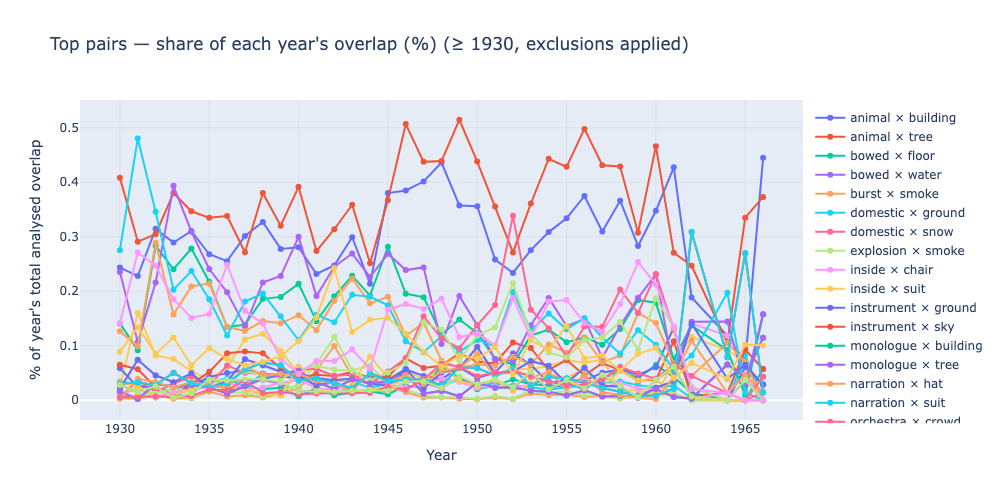

In [19]:
def plot_top_pair_share(
  pct_long_path,
  year_min_plot=1930,
  exclude_audio_tokens=None,
  exclude_visual_tokens=None,
  exclude_any_tokens=None,
  exclude_substrings=None,
):
  """
  Create top pair share visualization showing percent per year with legend panel.

  Args:
      pct_long_path: Path to top_pairs_percent_long.csv
      year_min_plot: Minimum year to include in plot
      exclude_audio_tokens: Set of audio tokens to exclude
      exclude_visual_tokens: Set of visual tokens to exclude
      exclude_any_tokens: Set of tokens to exclude from either audio or visual
      exclude_substrings: Set of substrings to exclude
      legend_max_rows_per_col: Maximum rows per legend column (unused, kept for compatibility)
      legend_col_width: Width of legend columns (unused, kept for compatibility)

  Returns:
      fig: Plotly figure object (for display or ipywidgets)
  """
  exclude_audio_tokens = exclude_audio_tokens or {
    "speech",
    "sound",
    "effect",
  }
  exclude_visual_tokens = exclude_visual_tokens or set()
  exclude_any_tokens = exclude_any_tokens or set()
  exclude_substrings = exclude_substrings or set()

  def _require_file(path) -> bool:
    if not path.exists():
      print(f"[skip] missing: {path}")
      return False
    return True

  def _split_pair_label(df: pd.DataFrame) -> pd.DataFrame:
    """Expect 'pair_label' like 'audio_token × visual_token'."""
    a_v = (
      df["pair_label"].astype(str).str.split(" × ", n=1, expand=True)
    )
    df["audio_token_plot"] = a_v[0].str.lower()
    df["visual_token_plot"] = (
      a_v[1].str.lower() if a_v.shape[1] > 1 else ""
    )
    return df

  def _apply_excludes(df: pd.DataFrame) -> pd.DataFrame:
    """Apply EXCLUDE_* rules at plotting time only."""
    if df.empty:
      return df

    df = _split_pair_label(df)

    ex_a = {t.lower() for t in exclude_audio_tokens}
    ex_v = {t.lower() for t in exclude_visual_tokens}
    ex_any = {t.lower() for t in exclude_any_tokens}

    mask_exact = (
      df["audio_token_plot"].isin(ex_a)
      | df["visual_token_plot"].isin(ex_v)
      | df["audio_token_plot"].isin(ex_any)
      | df["visual_token_plot"].isin(ex_any)
    )

    if exclude_substrings:
      lowersubs = {s.lower() for s in exclude_substrings}

      def _has_sub(s: str) -> bool:
        s = s or ""
        s = s.lower()
        return any(sub in s for sub in lowersubs)

      mask_sub = df["audio_token_plot"].apply(_has_sub) | df[
        "visual_token_plot"
      ].apply(_has_sub)
      mask = mask_exact | mask_sub
    else:
      mask = mask_exact

    before = len(df)
    df = df[~mask].copy()
    after = len(df)
    if before - after:
      print(
        f"[filter] excluded {before - after} rows based on token rules"
      )
    return df

  if not _require_file(pct_long_path):
    raise SystemExit(
      "Required CSV not found. Run the anypair export step first."
    )

  pct_long = pd.read_csv(pct_long_path)

  missing = {"pair_label", "year", "percent"} - set(pct_long.columns)
  if missing:
    raise SystemExit(
      f"top_pairs_percent_long.csv missing columns: {sorted(missing)}"
    )

  pct_long["year"] = pd.to_numeric(pct_long["year"], errors="coerce")
  pct_long = pct_long.dropna(subset=["year"]).copy()
  pct_long["year"] = pct_long["year"].astype(int)

  if year_min_plot is not None:
    pct_long = pct_long[pct_long["year"] >= year_min_plot].copy()

  pct_long = _apply_excludes(pct_long)

  if pct_long.empty:
    print("[stop] No percent data after filters; nothing to plot.")
    return None

  pairs_in_long = sorted(pct_long["pair_label"].unique().tolist())

  years = sorted(pct_long["year"].unique().tolist())
  pct_long_f = pct_long[
    pct_long["pair_label"].isin(pairs_in_long)
  ].copy()

  fig = go.Figure()

  # Add line plots for each pair
  for pair in pairs_in_long:
    yvals = []
    for y in years:
      v = pct_long_f.loc[
        (pct_long_f["pair_label"] == pair)
        & (pct_long_f["year"] == y),
        "percent",
      ]
      yvals.append(float(v.iloc[0]) if len(v) else 0.0)

    fig.add_trace(
      go.Scatter(
        x=years,
        y=yvals,
        mode="lines+markers",
        name=pair,
        marker=dict(size=6),
        line=dict(width=2),
      )
    )

  # Update layout
  year_min_str = f"≥ {year_min_plot}"
  fig.update_layout(
    title=f"Top pairs — share of each year's overlap (%) ({year_min_str}, exclusions applied)".strip(),
    xaxis_title="Year",
    yaxis_title="% of year's total analysed overlap",
    hovermode="x unified",
    showlegend=True,
    legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=1.01,
    ),
    height=500,
    width=1000,
  )

  # Update axes
  fig.update_xaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )
  fig.update_yaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )

  if not local:
    return fig

  file = root / "media" / "pair-overlap.png"

  fig.write_image(file)

  return Image(file)


display(
  plot_top_pair_share(data / "top_pairs_percent_long.csv"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-pair-overlap-*"],
        "type": "image",
        "source": [
          "The sound of top-pair-content within the Journal Digital collection—with vehicle x tree as a winner."
        ],
      },
    }
  },
)

In [ ]:
def pre_pivot_top_pairs(
  segments_csv_path,
  pairs_overall_csv_path,
  year_min=1930,
  top_n_pairs=15,
):
  """
  Create three visualizations of top audio-visual pairs.

  Line plot: percentage per year

  Args:
      segments_csv_path: Path to segments_filtered CSV
      pairs_overall_csv_path: Path to pairs_overall CSV
      year_min: Minimum year to include in titles
      top_n_pairs: Number of top pairs to plot

  Returns:
      Plotly figure object
  """
  # Load data
  segs = pd.read_csv(segments_csv_path)
  pairs_overall = pd.read_csv(pairs_overall_csv_path)

  # Get top pairs list
  top_pairs_list = (
    pairs_overall.head(top_n_pairs)[["audio_label", "vision_label"]]
    .apply(tuple, axis=1)
    .tolist()
  )

  # Filter segments to top pairs
  segs["pair"] = segs[["audio_label", "vision_label"]].apply(
    tuple, axis=1
  )
  segs_top = segs[segs["pair"].isin(top_pairs_list)]

  if segs_top.empty:
    print("[warn] No segments found for top pairs")
    return None, None, None

  # Create pivot table for seconds
  pivot = (
    segs_top.groupby(["pair", "year"])["duration_s"]
    .sum()
    .reset_index()
    .pivot(index="pair", columns="year", values="duration_s")
    .fillna(0.0)
  )

  # Create pivot table for percentages
  totals_by_year = (
    segs.groupby("year", as_index=True)["duration_s"]
    .sum()
    .astype(float)
  )
  pivot_pct = pivot.copy()
  denoms = totals_by_year.reindex(pivot_pct.columns).replace(
    0.0, np.nan
  )
  pivot_pct = (
    (pivot_pct.divide(denoms, axis=1) * 100.0)
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0.0)
  )

  return create_line_plot_percent(pivot_pct, year_min)


def create_line_plot_percent(pivot_pct, year_min):
  """Create line plot showing percentage per year for top pairs."""
  years_sorted_pct = sorted(pivot_pct.columns.tolist())

  fig = go.Figure()

  for pair in pivot_pct.index:
    yvals = [
      pivot_pct.at[pair, y] if y in pivot_pct.columns else 0.0
      for y in years_sorted_pct
    ]
    fig.add_trace(
      go.Scatter(
        x=years_sorted_pct,
        y=yvals,
        mode="lines+markers",
        name=f"{pair[0]} × {pair[1]}",
        marker=dict(size=6),
        line=dict(width=2),
      )
    )

  fig.update_layout(
    title=f"Top audio–vision pairs over years (% of year's total) — year ≥ {year_min}",
    xaxis_title="Year",
    yaxis_title="Share of year's overlap (%)",
    showlegend=True,
    legend=dict(
      orientation="h",  # Horizontal legend
      yanchor="top",  # Anchor the top of the legend box...
      y=-0.2,  # ...at a position below the x-axis (0 is the axis line)
      xanchor="center",
      x=0.5,
    ),
    margin=dict(l=10, r=10, t=80, b=150),
    height=500,
    width=1000,
    template="plotly_white",
  )

  fig.update_xaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )
  fig.update_yaxes(
    showgrid=True, gridwidth=0.5, gridcolor="rgba(128, 128, 128, 0.2)"
  )

  if not local:
    return fig

  file = root / "media" / "top-audio.png"

  fig.write_image(file)

  return Image(file)


display(
  pre_pivot_top_pairs(
    data / "segments_filtered_year_ge_1930.csv",
    data / "pairs_overall_year_ge_1930.csv",
  ),
  # width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-top-audio-*"],
        "type": "image",
        "source": [
          " Top audio-vision pairs within the Journal Digital collection—with crowds and artillery as top scorers."
        ],
      },
    }
  },
)

In 1947, Stellan Dahlstedt (1910–1991), published an article about the sound
studios at Svensk Filmindustri. Sound recording on film is hardly "the easiest
procedure in filmmaking, as more than one director or producer is willing to
attest". During recording, it was often not possible to achieve the sound
effects needed, Dahlstedt continued. In particular, it was difficult to "adjust
the strength and character of the different sounds during live recording.
Therefore, each sound is recorded separately as much as possible and mixed
during replay". It was no secret that such a practice increased the amount of
film stock used. Still, it saved time because there was "no need to experiment
with different sound effects during filming. It is the studio time that is the
most expensive part of a film recording"
<cite id="6473a"><a href="#zotero%7C22783102%2FFDPKQ7P8">(Dahlstedt 1947)</a></cite>
As director of film technology at SF, Dahlstedt knew what he was talking
about—even if he was all likely writing about feature film production rather
than newsreels. Then again, his statement to avoid experimenting with sound
effects during filming, has relevance for our audio analyses. On-location sound
in newsreel production seems to have been both fashionable and valued during
the period, but also technically demanding. Most sounds were added during
post-production, especially voice-over narration, but our analyses alone cannot substantiate the relation between diegetic and non-diegetic sound. What is lacking within our signal archaeology
set-up is the ability to align sound features more directly with visual
content, as is today done in several other multimodal learning approaches. If
newsreels did not consistently rely on synchronised or diegetic sound, it would
be misleading for computational models to assume that a visible object should
always have an audible counterpart. One way forward would be to integrate an
adjacent layer of information—the textual. Intertitles, commentary, and other
written elements often mediated the relationship between sound and image, and
their gradual incorporation into the audiovisual mix hence deserves closer
attention.

In [ ]:
display(
  Image("./media/img7.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-blueprint-*"],
        "type": "image",
        "source": [
          " At the Swedish SF company in the Film-City, north of "
          "Stockholm, a new sound laboratory was inaugurated in the "
          "late 1940s. It included a sound central (Ljudcentralen), an "
          "echo-chamber (Ekorum) and a muting room (Dämpat rum). On the "
          "second floor there was also a mixing room, and a specific "
          "newsreel facility."
        ],
      },
    }
  },
)

## Exploring intertitles

While signal archaeology renders some insight into the audio dimensions of the
Journal Digital collection, such a dataset by definition excludes early
(silent) cinema. Yet non-visual data can also be gleaned from the latter by
focusing on so-called intertitles. After 1900 they were inserted between scenes
to provide important details about location, time or setting after a scene
shift. With films growing longer, the use of intertitles also expanded. From
1910 until the advent of sound cinema, intertitles became common practice in
the film industry with its own conventions and codes. For examples, intertitles
came to incorporate extended textual passages that filled the screen,
typographic differentiation to mark hierarchies between narrator and dialogue,
and ornamental as well as stylistic devices that underscored the intertitles'
aesthetic function within the cinematic experience
<cite id="ukr4p"><a href="#zotero%7C22783102%2F8P2FL3R2">(Dupré La Tour 2005)</a></cite>.

When multi-reel feature films emerged, the intertitles provided a
crucial function offering information necessary to condense the story or
provide dialogue
<cite id="2v933"><a href="#zotero%7C22783102%2F8BSVNXZQ">(Chaume 2020)</a></cite>.
In newsreels, meanwhile, the intertitles functioned to structure the visual
storyline, provide factual information about time, settings and portrayed
individuals, and offer commentary guiding audience reactions. With the
introduction of sound, the use of intertitles certainly changed, and the
introduction of voice-over commentary made the intertitles shorter.
Nevertheless, this overlooked and in previous digital historical research
neglected audiovisual artefact includes a lot of textual information. In fact,
the Journal Digital collection contains almost fifty thousand intertitles; they
appear in more than 4,300 nonfiction films. Emphasis in this section will be
placed on contextualising the newsreel _Svensk Filmindustris Veckorevy_
(_Svensk Filmindustri’s Weekly Review_) and the Journal Digital Corpus,
describing the transcription pipeline, and exploring the intertitle contents.

In [ ]:
display(
  Image("./media/img8.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-military-*"],
        "type": "image",
        "source": [
          "Within the Journal Digital collection there are a number of "
          "foreign nonfiction films, such as this unidentified short "
          "film fragment from the mid 1910s, produced by Universal "
          "Screen Magazine, with more than ten intertitles in less than "
          "two minutes—albeit with short military orders!"
        ],
      },
    }
  },
)

Though previous research on newsreel intertitles is limited, there is a
noticeable tension regarding how the editorial comments should be interpreted
as a historical record. Some scholars argue that newsreel intertitles were
primarily descriptive and that it was only with the invention of sound
commentary that newsreels actually became a news medium proper. Nicolas Pronay,
for example, argues that the "range of social and political information which
could be conveyed by pictures and monosyllabic captions alone, was obviously
too restricted. The change-over to sound-film ... enabled them to cover any
subject which was news-worthy irrespective of whether it was pictorial in
nature"
<cite id="coqqu"><a href="#zotero%7C22783102%2FNTI97CTV">(Pronay 1971)</a></cite>.
Similarly, Nicholas Reeves, writing on the topic of British film propaganda
during World War I, contends that the "dominant approach of the newsreels’
editorial comment as carried by the titles was factual and restrained"
<cite id="6skwb"><a href="#zotero%7C22783102%2FWQEJMM77">(Reeves 1986)</a></cite>.
From this perspective, the textual information in early cinema had a limited
rhetorical function, due to both media technological conditions and established
genre conventions. Recent scholarship, however, have argued that long before
sound, newsreels included intertitles that "served to explain and ideologically
tint the footage sandwiched between them"
<cite id="b3ct8"><a href="#zotero%7C22783102%2FHDPCSX8E">(Scott 2024)</a></cite>.
Hence, the rhetoric in the newsreel intertitles guided viewers’ opinions in
advance of what appeared on screen—prior to the introduction of sound.

If the audio dataset of the Journal Digital collection gives us (at least some)
insights about Swedish modernity, we argue that a dataset of some fifty
thousand intertitles have a similar potential to provide commentary on Swedish
society, touching on a wide variety of cultural, technological, and societal
issues. Since intertitles were inserted into newsreeels—one textual prompt at
the time—the amount of words is not mind-boggling. Nevertheless, our dataset
still contains some 300,000 words. A key challenge when exploring these
newsreel intertitles using digital methods is the frequent occurrence of
mirrored flash intertitles. In film distribution and archiving, so-called flash
intertitles served a distinct purpose. Notably, flash intertitles do not appear
long enough for them to be readable. Rather they originally served as position
markers on the negative, which in this context were used as a master copy for
producing new prints, and hence pointing out exactly where to insert
intertitles when producing a positive. Besides pointing out the position of the
intertitles, the flash intertitles could also highlight the intended textual
and visual design. Further, this practice has been commonplace in film
distribution and archiving primarily to "save on expensive film material"
<cite id="nz0oz"><a href="#zotero%7C22783102%2FJQZ27MNN">(Dobringer, Stöger, and Wratschko 2013)</a></cite>.
Then again, to many film historians mirrored flash intertitles have always been
a nuisance, not the least since some formats for moving images make it totally
impossible to read them—on video it is hopeless, yet in an editing table they
can be read, and now also in digital format.

In [ ]:
display(
  Image("./media/img9.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-ski-*"],
        "type": "image",
        "source": [
          "It is almost impossible to read the low resolution, and "
          "mirrored flash intertitle, from _SF's Weekly Review_ "
          "(15 April 1929)—a day when prince Fredrik from Denmark "
          "arrived by train. The intertitle for the skiing competition "
          "in Oslo at Holmenkolmen is easier to understand "
          "(at least, if you speak Swedish), taken from, "
          "_SF's Weekly Review_ "
          "(26 February 1921). Mirrored flash intertitles are "
          "today still default for film historians using the Journal "
          "Digital collection at the National Library of Sweden; at "
          '[filmarkivet.se](https://filmarkivet.se){:target="_blank"}, '
          'however, restored and high resolution '
          "intertitle meets the viewer."
        ],
      },
    }
  },
)

There is little previous research on newsreel intertitles using digital
methods. A notable exemption is a study on the Jean Desmet collection
(1907–16), housed by the EYE Film Museum in the Netherlands. The authors show
the usefulness of deep learning methods to detect intertitles in audiovisual
corpora as markers of narrative structure
<cite id="77a57"><a href="#zotero%7C22783102%2FPUAS8ZHL">(Bhargav, Van Noord, and Kamps 2019)</a></cite>.
While Bhargav and colleagues demonstrate the technical feasibility of using
deep learning to detect and analyse intertitles in early cinema, our study
expands the approach by developing a multimodal transcription pipeline for a
much larger corpus of Swedish newsreels spanning five decades. As briefly
described in our introduction, we developed a tool 
(stum) to create individual .srt files for the 4,327 film with
intertitles. The exact amount of texts totaled 302,312 words. Notably, the
intertitles have a lower capacity for encoding text than a voice narrator, but
still remains a vital source of information about the content of the films.
Moreover, beside metadata about films, it is the only way to cover what the
newsreels were actually about. It should be stressed, however, that given the
major amount of catalogue work that Gardar Sahlberg (and other staff at SVT/SR)
did during the 1960s and 1970s, the metadata for most films within the
SF-archive is affluent.

In [ ]:
class PNGSequencePlayer:
  def __init__(self, file_paths, fps=24):
    """
    file_paths: A list of string paths to the .png files (sorted).
    fps: Default playback speed.
    """
    # 1. Pre-load all PNG bytes into memory for zero-latency playback
    self.frames_data = []
    try:
      for p in file_paths:
        with open(p, "rb") as f:
          self.frames_data.append(f.read())
    except Exception as e:
      print(f"Error loading files: {e}")
      return

    self.n_frames = len(self.frames_data)
    self.is_paused_event = False

    # --- UI Components ---

    # We tell the widget these are PNGs
    self.image_widget = widgets.Image(
      value=self.frames_data[0],
      format="png",
      layout=widgets.Layout(width="auto", max_width="250px"),
    )

    # Animation Controller
    self.play_widget = widgets.Play(
      value=0,
      min=0,
      max=self.n_frames - 1,
      step=1,
      interval=int(1000 / fps),
      description="Press play",
      repeat=False,
    )

    # Scrubber
    self.slider = widgets.IntSlider(
      value=0, min=0, max=self.n_frames - 1, description="Frame"
    )

    # Controls
    self.fps_input = widgets.BoundedIntText(
      value=fps,
      min=1,
      max=120,
      step=1,
      description="FPS:",
      layout=widgets.Layout(width="140px"),
    )

    self.loop_box = widgets.Checkbox(value=False, description="Loop")

    # Pause Logic UI
    self.pause_enable = widgets.Checkbox(
      value=True, description="Wait 2s @ Frame:"
    )
    self.pause_idx = widgets.BoundedIntText(
      value=12,
      min=0,
      max=self.n_frames - 1,
      description="",
      layout=widgets.Layout(width="60px"),
    )

    # --- Logic Wiring ---

    widgets.jslink(
      (self.play_widget, "value"), (self.slider, "value")
    )

    self.slider.observe(self.on_frame_change, names="value")
    self.fps_input.observe(self.update_speed, names="value")
    self.loop_box.observe(self.update_loop, names="value")

    # --- Layout ---

    # Group the specific pause controls
    pause_group = widgets.HBox([self.pause_enable, self.pause_idx])

    controls = widgets.VBox(
      [
        widgets.HBox([self.play_widget, self.slider]),
        widgets.HBox([self.fps_input, self.loop_box, pause_group]),
      ]
    )

    self.ui = widgets.VBox([self.image_widget, controls])

  def on_frame_change(self, change):
    frame_idx = change["new"]

    # DIRECT BYTE SWAP - Extremely fast
    self.image_widget.value = self.frames_data[frame_idx]

    # Check for "Magic Pause"
    if (
      self.play_widget.playing
      and self.pause_enable.value
      and frame_idx == self.pause_idx.value
      and not self.is_paused_event
    ):
      self.trigger_pause()

  def trigger_pause(self):
    """Stops animation, waits 2s in background thread, resumes."""
    self.is_paused_event = True
    self.play_widget.playing = False  # Stop

    def resume_worker():
      time.sleep(2)
      self.play_widget.playing = True  # Resume
      # Tiny buffer to ensure we don't re-trigger on the same millisecond
      time.sleep(0.2)
      self.is_paused_event = False

    threading.Thread(target=resume_worker).start()

  def update_speed(self, change):
    if change["new"] > 0:
      self.play_widget.interval = int(1000 / change["new"])

  def update_loop(self, change):
    self.play_widget.repeat = change["new"]

  def show(self):
    display(self.ui)


one_second = Path(".") / "media" / "one_second"


def make_terrier():
  terrier = PNGSequencePlayer(sorted(one_second.glob("*.png")))
  return terrier.show()


display(
  Image("./media/1s.grid.png") if local else make_terrier(),
  metadata={
    "jdh": {
      "module": "object",
      "tags": [
        "figure-terrier-*",
      ],
      "object": {
        "type": "image",
        "source": [
          "Blink and you will miss it. We have cut 25 frames, "
          "equivalent to 1 second of playtime, from SF604A "
          "which showcases several of the technical obstacles of "
          "working with this this archival footage: (1.) the "
          "video compression is very lossy, leading to many blocky "
          "artefacts; (2.) the flash intertitle is only fully visible "
          "in a single frame (frame 12)—making it not only "
          "impossible for a viewer to _read_ it—but also very likely "
          "that they will miss it entirely;  (3.) the intertitle is "
          "left-right mirrored, making it more difficult to "
          "read—especially for an OCR software."
        ],
      },
    }
  },
)

### Transcribing flash intertitles 

The tool _stum_
<cite id="qev7a"><a href="#zotero%7C22783102%2FTT5RIEE2">(Johansson 2025)</a></cite>
combines three well established libraries to create a pipeline suitable for
the analysis of the silent part of the Journal Digital film collection:
OpenCV2 for image processing 
<cite id="vn2wg"><a href="#zotero%7C22783102%2FMFU9DVN9">(Bradski 2000)</a></cite>, 
EAST for text detection 
<cite id="4h8ft"><a href="#zotero%7C22783102%2FDBCYMUBB">(Zhou et al. 2017)</a></cite>, and TesseractOCR for the text extraction 
<cite id="9cr2o"><a href="#zotero%7C22783102%2FAZ3BT53M">(Smith 2007)</a></cite>. 
The OCR quality of all the tested intertitles were excellent; the highest 
Character Error Rate we encountered was below seven percent. The main problem 
to solve was intertitle detection. Due to the prevalence of flash intertitles, 
we first needed process every frame. However, passing 
every frame through the OCR engine is highly inefficient. To avoid this we
gropued frames by sequential similarity. More specifically, we compared the
Means Square Error of every two frames, and grouped images together where the
difference was low, and instead used the middle image to represent the entire
group of images. Next we passed all these representative images to detect
large contour on the scale of a monochrome
background. Next, we used EAST to filter out images with a low probability of
containing text. Finally, we passed the original and left-right mirrored version
through TesseractOCR for extraction of intertitle text.

In [ ]:
# ./src/stum/contours.py

# 3.c Calculate how large the biggest contour is relative to the frame
def largest_contour(binary_image: cv2.typing.MatLike):
  """Returns the relative area of the largest contour of the image"""
  contours = cv2.findContours(
    binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
  )[0]
  largest = cv2.contourArea(max(contours, key=cv2.contourArea))

  width, height = binary_image.shape
  total_area = width * height
  relative_area = largest / total_area

  return relative_area

# 3 Filter out sequences without large contours
def contour_filter(image: cv2.typing.MatLike, threshold=0.9) -> bool:
  """Check if image has one large contour

  If the largest contour is smaller than the complement to the threshold,
  it also calculates the largest contour of the inverted image. This is a
  way to check for images with dark backgrounds and white text.

  Parameters
      image: cv2 image to check
      threshold: threshold to check contour area against, default is 90%

  Returns
      True if image has one contour larger than given threshold
  """
  # 3.b Convert image to grayscale and then binary 
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  binary = cv2.threshold(
    gray, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV
  )[1]

  # 3.c Calculate how large the biggest contour is relative to the frame
  relative_area = largest_contour(binary)

  # 3.d Check if complement is larger than threshold
  if (1 - relative_area) > threshold:

    # 3.e If so, invert the pixels and calculate a new largest areas
    inverted = cv2.bitwise_not(binary)

    inverteds_largest_area = largest_contour(inverted)

    relative_area = max(relative_area, inverteds_largest_area)

  return relative_area > threshold


# ./src/stum/tesseract.py

# 2.b Try to extract text
def extract_text(image: cv2.typing.MatLike, contour_threshold=0.9) -> str:
    """Extract texts, or lack thereof from an image

    Uses `ocr_mirror_ocr` to OCR original and mirrored version of the image.

    If no text is found, it first checks for contours in the image -- and
    if the largest contour is > `contour_threshold` (default 90%) the
    binary inverse of the image will be used instead. If this also has a
    single contour that is > `contour_threshold` an empty string is returned.

    Otherwise, the image is cropped to the contour and then passed thorugh
    `ocr_mirror_ocr` to get the text (or lack thereof.)

    Arguments:
        image {cv2.typing.MatLike} -- The image to extract texts from
    output:
        {str} -- The extracted text, is empty if no text is found
    """

    # 4 use EAST to detect presence of text
    if not east_filter(image):
        return ""

    # 5 first text extraction attempt
    result = ocr_mirror_ocr(image)

    if result != "":
        return result

    # If results were inconclusive, crop image to reduce noise and try again    
    _, thresh1 = cv2.threshold(
        cv2.cvtColor(
            image,
            cv2.COLOR_BGR2GRAY,
        ),
        100,
        255,
        cv2.THRESH_BINARY_INV,
    )

    im2 = image.copy()
    width, height, _ = image.shape
    total_area = width * height
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

    # Find bounding box of largest contour in original
    x, y, w, h = largest_contour_box(thresh1, rect_kernel)

    if contour_area(x, y, w, h) / total_area > contour_threshold:
        thresh1 = cv2.bitwise_not(thresh1)

        # Find bounding box of largest contour in mirror
        x, y, w, h = largest_contour_box(thresh1, rect_kernel)

        if contour_area(x, y, w, h) / total_area > contour_threshold:

            # If neither area is large enough to keep, terminate
            return ""

    # Cropping the text block for giving input to OCR
    cropped = im2[y : y + h, x : x + w]

    # 5 Final text extraction attempt
    return ocr_mirror_ocr(cropped)


# 5 first text extraction attempt
def ocr_mirror_ocr(image):
    """Extract texts, or lack thereof from an image

    Passes the original and a mirrored version of the image through OCR
    and returns the 'best' text of the two.
    'best' being the text with the fewest special characters.

    Arguments:
        image {cv2.typing.MatLike} -- The image to extract texts from
    output:
        {str} -- The extracted text, is empty if no text is found
    """

    # Pass original and mirrored image through tesseract
    original_text = pytesseract.image_to_string(image, lang="swe")
    mirrored_text = pytesseract.image_to_string(cv2.flip(image, 1), lang="swe")

    # Use the text with the fewest special characters.
    if count_special_chars(mirrored_text) < count_special_chars(original_text):
        text = mirrored_text
    else:
        text = original_text

    result = clean_text(text)
    return result


"""
./src/stum/east.py

model_loc = (
    Path('.').parents[2] / "models" / "frozen_east_text_detection.pb"
)

east_net = cv2.dnn.readNet(str(model_loc))

layerNames = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]
"""

# 4 use EAST to detect presence of text
def east_filter(image: cv2.typing.MatLike) -> bool:
  """
  This function filters an image using the EAST text detection model.

  Parameters:
  - image (cv2.typing	MatLike): The input image to be filtered.

  Returns:
  - A boolean indicating whether the image contains any detected text or not.
  """

  image_height, image_width = image.shape[:2]

  blob = cv2.dnn.blobFromImage(
    image,
    1.0,
    (image_width, image_height),
    (123.68, 116.78, 103.94),
    swapRB=True,
    crop=False,
  )

  east_net.setInput(blob)
  scores, _ = east_net.forward(layerNames)

  num_scores = scores.shape[2]

  score_data = [scores[0, 0, i] for i in range(num_scores)]

  max_score = max([max(row) for row in score_data])
  return max_score > 0.5


"""
.src/stum/video_to_srt.py

MSE_THRESHOLD = 10_000
"""

def mse(im1, im2):
  err = np.sum((im1.astype("float") - im2.astype("float")) ** 2)
  err /= float(im1.shape[0] * im1.shape[1])
  return err

# 2.a Check for changes in sequential frames
def detect_scene_change(im1, im2):
  score = mse(im1, im2)
  return score > MSE_THRESHOLD


# 2. Group farmes on sequential similarity 
def group_frames(frames_dir):
    frames = sorted(frames_dir.glob("*.png"))

    if len(frames) == 0:
        raise FileNotFoundError(f"No frames found in {frames_dir=}")

    grp_cnt = 0
    for idx, frame in enumerate(frames):
        if idx == 0:
            im1 = cv2.imread(str(frame))
            grp_dir = frames_dir / "group_000"
            grp_dir.mkdir()

            frame.rename(grp_dir / frame.name)
            continue

        im2 = cv2.imread(str(frame))
        
        # 2.a Check for changes in sequential frames
        if detect_scene_change(im1, im2):
            grp_cnt += 1
            grp_dir = frames_dir / f"group_{grp_cnt:03}"
            grp_dir.mkdir()

        frame.rename(grp_dir / frame.name)

        im1 = im2

# 2.a Apply filters and extract texts
def filter_frame_groups(group_dirs, debug=False):
    def clear_dir(dir_path, debug=False):
        if debug:
            zip_file = dir_path.with_suffix(".zip")
            with zipfile.ZipFile(zip_file, "w") as zf:
                for file in dir_path.iterdir():
                    zf.write(file, arcname=file.name)

        for file in dir_path.iterdir():
            file.unlink()
        dir_path.rmdir()

    for group_dir in group_dirs:
        frames = sorted(group_dir.glob("*.png"))
        middle = int(len(frames) / 2)

        # 2.b Use the middle frame to represent the entire scene
        middle_frame = frames[middle]

        image = cv2.imread(str(middle_frame))

        # 3 Filter out sequences without large contours
        if not contour_filter(image):
            # 3.f if no large contours were found, discard group
            clear_dir(group_dir)
            continue

        # 2.b Try to extract text
        text = extract_text(image)
        if text == "":
            clear_dir(group_dir, debug)
            continue

        with open(group_dir / "intertitle.txt", "x") as f:
            f.write(text)


def pipeline(input: Path, output_file: Path, debug: bool = False):
    """Extracts intertitletexts from a video file and writes them to an SRT.

    Parameters:
    - input (Path): The path to the input video file.
    - output_file (Path): The path where the generated SRT subtitle file will
      be saved.
    - debug (bool, optional): If True, the intermed`iate processing files are
      not deleted and can be used for debugging. Default is False.

    Process:
    1. Extract frames from the input video.
    2. Group frames into sequences of similar frames using Mean Squared Error
       (MSE).
    3. Filter frame groups to keep only those with valid intertitles based on
       contour detection and text extraction.
    4. Merge sequences that have similar intertitle texts.
    5. Convert the remaining intertitles into namedtuples, representing each
       intertitle by its index, start frame number, end frame number, and
       extracted text.
    6. Generate SRT subtitle format from the namedtuple list of intertitles.
    7. Save the generated SRT content to the specified output file.

    The resulting SRT file will have timestamps derived from frame numbers
    using a fixed frames per second (FPS) rate.
    """

    if debug:
        processing_dir = input.with_suffix("")
        processing_dir.mkdir()
    else:
        processing_dir = Path(mkdtemp())

    # 1. Use ffmpeg to extract all frames
    video_to_frames(input, processing_dir)

    # 2. Group farmes on sequential similarity 
    group_frames(processing_dir)
    
    group_dirs = tqdm(
        [dir for dir in processing_dir.iterdir() if dir.is_dir()],
        desc="Processing groups",
    )

    # 2.a Apply filters and extract texts
    filter_frame_groups(group_dirs, debug=debug)

    # Merge adjacent groups with near identical texts
    merge_sequences(processing_dir)
    
    # Convert frame-numbering and extracted text to SRT 
    intertitles = sequence_to_namedtuples(processing_dir)
    srt = intertitles_to_srt(intertitles)

    output_file.open("w", encoding="utf-8").write(srt)



Quantitative and computational approaches to film history have a longer history
than is often assumed. Indeed, experiments with quantification and data
visualisation date back to the 1960s and 1970s, when scholars such as Barry
Salt began measuring average shot lengths
<cite id="m6sna"><a href="#zotero%7C22783102%2FGVASD2H8">(Gaines 2024)</a></cite>.
Similarly, in the mid-2000s, the large-scale Cinemetrics database for
statistical film style analysis was launched
<cite id="sk6ia"><a href="#zotero%7C22783102%2FGVASD2H8">(Gaines 2024)</a></cite>.
These early initiatives foreshadowed the current wave of digital film history,
which tends to combine distant and close viewing
<cite id="ejcan"><a href="#zotero%7C22783102%2F3TIXWE3B">(Dang, Van Der Heijden, and Olesen 2024)</a></cite>.
Our emphasis in the following lies on using word frequencies to explore
what role intertitles had in newsreels over time, as well as exploring (the now
searchable) newsreel intertitles focusing on the theme of modernity. With
regard to Swedish film history, scholars have noted that the introduction of
sound soon had a significant impact on the newsreel genre. In December 1929,
the film _Say it with music_ (directed by Edvin Adolphson and Julius Jaenzon)
was advertised as the first Swedish sound film
<cite id="tb5lm"><a href="#zotero%7C22783102%2F94IX6F2L">(Furhammar 2003)</a></cite>.
Shortly thereafter, in April 1930, the first newsreel with authentic sound was
released featuring the Guard Parade in Stockholm
<cite id="4qxog"><a href="#zotero%7C22783102%2F94IX6F2L">(Furhammar 2003)</a></cite>.
However, due to the fact that the sound equipment was still difficult to
handle, newsreels initially featured voice-over commentary with "brisk and
witty texts"
<cite id="wmyjk"><a href="#zotero%7C22783102%2F94IX6F2L">(Furhammar 2003)</a></cite>.
Having extracted all intertitles from the Journal Digital collection it is
possible to detect how the narrative usage of intertitles changed over time.
While newsreels quickly became a sound medium—a "medium of the voice"
<cite id="rqbbs"><a href="#zotero%7C22783102%2F94IX6F2L">(Furhammar 2003)</a></cite>—a
quantitative analysis reveals that the reliance on intertitles persisted longer
than one might have imagined. The period from the mid 1910s to the early 1930s
stands out as the period when most words per intertitle were used, which is
hardly surprising given that films were then silent. More surprisingly  it was not until the late 1930s that the number of words per
intertitle was reduced to the same levels as prior to the introduction of
sound. Similarly, the total number of words in the intertitles grew in the
1920s, and then subsided toward the end of the 1930s. In addition—and worth
stressing—is that intertitles remained in use throughout the whole newsreel
era, up until the advent of television around 1960. In this sense, intertitles
continued to play a narrative role also after newsreels became a "medium of the
voice".

The corpus of our transcriptions is published on GitHub, Zenodo and PyPI, which
is the easiest way to get access to it within a notebook. All we have to do is
install the library and load the _Corpus_ class -- and we can use its iterator
to access all the transcriptions in order. While we load it, we also calculate
the absolute and relative frequencies of the words 'by' and 'staden', the
results of which are shown in [below](#figure-by-staden-*).

In [26]:
def load_intertitles():
  corpus = Corpus("txt", texts_to_include="intertitles")

  for srt in corpus:
    year = srt.year
    if not year.isdigit():
      continue
    year = int(year)
    if year < 1900:
      continue

    intertitles = srt.content.split("\n")
    tokens = srt.content.lower().split()
    word_count = len(tokens)
    words_per_intertitle = word_count / len(intertitles)

    # Calculating for later
    count_by = tokens.count("by")
    count_staden = tokens.count("staden")
    rel_by = count_by / word_count if word_count > 0 else 0.0
    rel_staden = count_staden / word_count if word_count > 0 else 0.0

    yield {
      "file": srt.filename,
      "year": year,
      "num_intertitles": len(intertitles),
      "num_words": word_count,
      "words_per_intertitle": words_per_intertitle,
      # Calculating for later
      "count_by": count_by,
      "rel_by": rel_by,
      "count_staden": count_staden,
      "rel_staden": rel_staden,
    }


corpus_df = pd.DataFrame(load_intertitles())

In [ ]:
def bootstrap_confidence_interval(data, n_bootstrap=1000, ci=95):
  """Calculates the mean and bootstrapped confidence interval."""
  bootstrap_means = np.zeros(n_bootstrap)
  for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(
      data, size=len(data), replace=True
    )
    bootstrap_means[i] = np.mean(bootstrap_sample)

  lower_bound = np.percentile(bootstrap_means, (100 - ci) / 2)
  upper_bound = np.percentile(bootstrap_means, 100 - (100 - ci) / 2)

  return pd.Series(
    {
      "mean": np.mean(data),
      "ci_lower": lower_bound,
      "ci_upper": upper_bound,
    }
  )


def create_combined_plot(df):
  # Create a figure with 2 rows and 1 column
  fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=(
      "Average number of words per intertitle",
      "Average number of words per video",
    ),
    vertical_spacing=0.15,
  )

  # Configuration for the two subplots
  plot_configs = [
    {
      "col": "words_per_intertitle",
      "row": 1,
      "y_label": "Words/Intertitle",
    },
    {"col": "num_words", "row": 2, "y_label": "Words/Video"},
  ]

  for config in plot_configs:
    # Calculate statistics
    summary_df = (
      df.groupby("year")[config["col"]]
      .apply(bootstrap_confidence_interval)
      .unstack()
      .reset_index()
    )

    # 1. Add the Confidence Interval Band
    fig.add_trace(
      go.Scatter(
        x=np.concatenate(
          [summary_df["year"], summary_df["year"][::-1]]
        ),
        y=np.concatenate(
          [summary_df["ci_upper"], summary_df["ci_lower"][::-1]]
        ),
        fill="toself",
        fillcolor="rgba(0,100,80,0.2)",
        line=dict(color="rgba(255,255,255,0)"),
        hoverinfo="skip",
        showlegend=False,
        name="95% CI",
      ),
      row=config["row"],
      col=1,
    )

    # 2. Add the Mean Line
    fig.add_trace(
      go.Scatter(
        x=summary_df["year"],
        y=summary_df["mean"],
        line=dict(color="rgb(0,100,80)"),
        mode="lines",
        name="Mean",
      ),
      row=config["row"],
      col=1,
    )

    # Update individual axis labels
    fig.update_yaxes(
      title_text=config["y_label"], row=config["row"], col=1
    )
    fig.update_xaxes(title_text="Year", row=config["row"], col=1)

  # Global layout updates
  fig.update_layout(
    height=800,  # Adjust height for two subplots
    width=1000,  # Adjust height for two subplots
    showlegend=False,
    title_text="Intertitle Trends Analysis",
    template="plotly_white",
  )

  if not local:
    return fig

  file = root / "media" / "intertitle-trends.png"

  fig.write_image(file)

  return Image(file)


display(
  create_combined_plot(corpus_df),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-intertitle-trends-*"],
        "type": "image",
        "source": [
          "The chart above plots the number of words that were used in "
          "each intertitle covering the entire Journal Digital "
          "collection. The chart below charts the average number of "
          "words in each film with intertitles, also in the entire "
          "Journal Digital collection. "
        ],
      },
    }
  },
)

As noted, automatic speech recognition and other machine listening techniques
have contributed toward making audiovisual archives searchable and computable.
In this case, the transcription of the intertitles allowed us to explore the
textual descriptions with simple word frequencies. Some rudimentary
observations can be made with regard to topics covered. Not surprisingly,
"Sweden", "Swedish" and the capital of "Stockholm" are among the most
frequently occurring words in the intertitle dataset. In terms of geography,
other frequently mentioned cities are "Gothenburg", "Paris" and "London". This
highlights the fact that the newsreel as a medium was highly transnational:
reels depicting current events were bought, exchanged and distributed across
Europe and the world
<cite id="ek61p"><a href="#zotero%7C22783102%2F685XZA23">(Chambers, Jönsson, and Winkel 2018)</a></cite>.
In terms of thematic coverage, it is also noteworthy that the word "staden", the
town (115 counts), and the word "by", village (106 counts), occur almost just
as frequently 
in the intertitle corpus. Whereas the word
"town" shows a concentration around the 1920s and 1930s, the word "by" is
distributed more evenly across the corpus. This is thought-provoking given that
the 1920s and 1930s have usually been described as a period of dramatic
transformation, and a time when modernity arrived in Sweden.


In [ ]:
def create_frequency_scatter(df, word, color="salmon"):
  """
  Create a Plotly scatter plot showing relative frequencies (excluding zeros).

  Args:
      df: DataFrame with columns [filename, rel_frequency]
      word: The word being plotted (for title)
      color: Color for scatter points

  Returns:
      plotly.graph_objects.Figure
  """
  # Filter out zero frequencies to focus on files that contain the word
  df_nonzero = df[df["rel_frequency"] > 0].copy()
  df_nonzero = df_nonzero.sort_values("rel_frequency").reset_index(
    drop=True
  )

  fig = go.Figure()

  # Create line plot
  fig.add_trace(
    go.Scattergl(
      x=list(range(len(df_nonzero))),
      y=df_nonzero["rel_frequency"],
      mode="lines",
      line=dict(color=color, width=2),
      text=df_nonzero["filename"],
      hovertemplate=(
        "<b>%{text}</b><br>Relative "
        "Frequency: %{y:.5f}<extra></extra>"
      ),
      showlegend=False,
    )
  )

  # Configure layout
  fig.update_layout(
    title=dict(
      text=(
        f'Relative Frequencies for "{word}"<br><sub>{len(df_nonzero)}'
        f"files (excluding {len(df) - len(df_nonzero)} files with "
        "zero frequency)</sub>"
      ),
      x=0.5,
      xanchor="center",
      font=dict(size=14),
    ),
    xaxis=dict(
      title="Files (sorted by frequency)",
      rangemode="tozero",
    ),
    yaxis=dict(
      title="Relative Frequency",
      rangemode="tozero",
    ),
    plot_bgcolor="white",
    height=600,
  )

  return fig


def create_dual_axis_plot(color_by="#E57373", color_staden="#7D8B7D"):
  """
  Create a Plotly dual y-axis plot showing relative frequencies.

  Returns:
      plotly.graph_objects.Figure with dual y-axes
  """

  dual_df = corpus_df.query(
    "`count_by` > 0 | `count_staden` > 0"
  ).sort_values(["year", "file"])

  # Calculate statistics for y-axis labels
  total_by = int(corpus_df["count_by"].sum())
  files_by = int((corpus_df["count_by"] > 0).sum())
  total_staden = int(corpus_df["count_staden"].sum())
  files_staden = int((corpus_df["count_staden"] > 0).sum())

  fig = go.Figure()

  # Trace 1: by on left y-axis with circle markers
  fig.add_trace(
    go.Scattergl(
      x=dual_df["file"],
      y=dual_df["rel_by"],
      mode="lines+markers",
      name="by",
      line=dict(color=color_by, width=2),
      marker=dict(symbol="circle", size=6, color=color_by),
      customdata=dual_df[["count_by"]].values,
      hovertemplate=(
        "by: %{y:.5f} (%{customdata[0]:.0f} occurrences)"
        "<extra></extra>"
      ),
      yaxis="y1",
    )
  )

  # Trace 2: staden on right y-axis with triangle markers
  fig.add_trace(
    go.Scattergl(
      x=dual_df["file"],
      y=dual_df["rel_staden"],
      mode="lines+markers",
      name="staden",
      line=dict(color=color_staden, width=2),
      marker=dict(symbol="triangle-up", size=8, color=color_staden),
      customdata=dual_df[["count_staden"]].values,
      hovertemplate=(
        "staden: %{y:.5f} (%{customdata[0]:.0f} occurrences)"
        "<extra></extra>"
      ),
      yaxis="y2",
    )
  )

  # Configure layout with dual y-axes
  fig.update_layout(
    title=dict(
      text=f'Relative Frequencies: "by" and "staden"<br>'
      f"<sub>{len(dual_df)} files (where at least one word appears)</sub>",
      x=0.5,
      xanchor="center",
      font=dict(size=14),
    ),
    xaxis=dict(
      title="Files (sorted by year → filename)",
      showticklabels=False,
      type="category",
    ),
    yaxis=dict(
      title=dict(
        text=(
          f'<b style="color:{color_by}">by</b> Relative Frequency<br>'
          f'<sub>{total_by} occurrences in {files_by} files</sub>'
          ),
        font=dict(color=color_by),
      ),
      rangemode="tozero",
      side="left",
    ),
    yaxis2=dict(
      title=dict(
        text=(
          f'<b style="color:{color_staden}">by</b> Relative Frequency'
          f'<br><sub>{total_staden} occurrences in {files_staden} '
          'files</sub>'),
        font=dict(color=color_staden),
      ),
      rangemode="tozero",
      overlaying="y",
      side="right",
    ),
    plot_bgcolor="white",
    height=400,
    width=800,
    hovermode="x unified",
    legend=dict(
      orientation="h",
      yanchor="bottom",
      y=1.02,
      xanchor="center",
      x=0.5,
    ),
  )

  if not local:
    return fig

  file = root / "media" / "by-staden.png"

  fig.write_image(file)

  return Image(file)


def make_by_stad_plot():
  return create_dual_axis_plot(
    color_by="#E57373", color_staden="#7D8B7D"
  )


display(
  make_by_stad_plot(),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-by-staden-*"],
        "type": "image",
        "source": [
          "Two charts display the occurrences of _staden_ (city) "
          "and _by_ (village) in the intertitle dataset from the "
          "Journal Digital collection—where they appear almost the "
          "same amount of times. The films have archival names "
          "(such as SF200) with an added year."
          "\n"
          "[ Del ? ]"
        ],
      },
    }
  },
)

Intertitle transcriptions cannot only be used to mine the text material at
scale, it also makes it possible to navigate the material from a qualitative
point-of-view. Zooming in on the issue of modernity, for example, it is
feasible to use keyword search to find newsreels on distinct topics
<cite id="8jann"><a href="#zotero%7C22783102%2FKADI4AFW">(Armaselu and Fickers 2024)</a></cite>.
For instance, searching for the word "moderna" results in 
[66 hits](https://modern36.github.io/jdc_reader/#q=moderna&type=intertitle){:target="_blank"} 
and "modern" in
[146 hits](https://modern36.github.io/jdc_reader/#q=modern&type=intertitle){:target="_blank"}.
This allows one to detect specific newsreels with modern aspects of Swedish
society, prevalent mostly during the 1920s and 1930s, with urban renewal
projects, progressive social and employment reforms, and women gaining the
right to vote
<cite id="7hx24"><a href="#zotero%7C22783102%2F6VFT9YB8">(Widenheim 2002)</a></cite>,
<cite id="er18t"><a href="#zotero%7C22783102%2F2X3XHIU7">(Habel 2002)</a></cite>.
Some parts of the intertitle dataset naturally mirror prior metadata. Yet, our
corpus of intertitles (with .srt files) also allows you to find the exact
filmic moment (via time stamps) when an intertitle appears—which, furthermore,
holds true for all transcribed speech—making it possible to navigate the
audiovisual material in new ways. Given our interest in issues around Swedish
modernity, a search for _modern_ in the intertitle dataset, gives a vivid
result of films—from a 1920s newsreel on defence exercise including "modern
artillery weapons" (SF488B), and another newsreel item about a novel (and
modern) fish market in the Stockholm Old Town (SF460), to a newsreel insert
about state-of-art telephones in 1926 (SF519), the same year that the Swedish
inventor Lars Magnusson Ericsson celebrated his 80th birthday (sadly he passed
away later the same year). In this way, the intertitle dataset—gleaned from the
Journal Digital corpus—indeed makes it possible to easily shift from
large-scale text mining, to close qualitative analysis of particular newsreels.

In [ ]:
display(
  Image("./media/img10.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-telephone-*"],
        "type": "image",
        "source": [
          '"The difference between the first telephone ... and the '
          'modern table telephone is of significance\", the '
          "_SF's Weekly Review_ "
          "(10 May 1926) stated. Via search through the "
          "intertitles from Journal Digital Corpus, it "
          "becomes possible to find films and segments "
          "otherwise hard to find—in this case using the search "
          "phrase moderna."
        ],
      },
    }
  },
)

## Scalable Geographic Reading

SF newsreel production was headquartered in
Stockholm—did this urban location dictate which parts of Sweden that appeared
on cinema screens across the country? Which places were depicted, and how were
they represented? Did the _SF Weekly Review_ favour certain locations? Was there
an urban gaze framing modernity via the provincial, the rural, or the remote?
Such geographic questions of representation have prior been difficult to answer
in a systematic way. While individual newsreels can be analysed, the sheer
volume of filmic material within the SF archive–decades of weekly or bi-weekly
releases–has made corpus-level inquiry impractical. However, with the
introduction of the Journal Digital Corpus, it is now possible to analyse filmic
geographies. As we previously described how signal archaeology was
used to analyse the Journal Digital collection via AST, 
and how we subsequently used
stum to create a corpus from newsreel intertitles, we
similarly created  _SweScribe_ 
<cite id="5cysi"><a href="#zotero%7C22783102%2F5U2K4DR4">(Aspenskog and Johansson 2025)</a></cite>
for transcribing the speech in newsreels. 
At its core lies _WhisperX_
<cite id="2xlle"><a href="#zotero%7C22783102%2F89SWX3HE">(Bain et al. 2023)</a></cite>,
which combines Whisperfrom OpenAI with a _wav2vec2_ model, fine-tuned for
Swedish
<cite id="8zu0n"><a href="#zotero%7C22783102%2FAGCZGSA8">(Malmsten, Haffenden, and Börjeson 2022)</a></cite>
, to transcribe and temporally align speech.
Feeding SweScribe 2,544 newsreels containing speech
we created a corpus comprising 2,225,334 words 
<cite id="rlzkj"><a href="#zotero%7C22783102%2F5LZCK9F3">(Aspenskog, Johansson, and Snickars 2025)</a></cite>.

It should be noted that early testing revealed weaknesses: Whisper struggles
with noisy environments and overlapping speakers, and tended to hallucinate when speech was unintelligible. We addressed these through iterative cleaning steps, expanding our
ground truth dataset from 27 to 89 manual transcriptions (72,812 words) across
three sampling rounds, which considerably reduced Word Error Rate (WER) from 17
percent to only seven percent
<cite id="qdv2n"><a href="#zotero%7C22783102%2F5LZCK9F3">(Aspenskog, Johansson, and Snickars 2025)</a></cite>.
SweScribe works in the following 4 steps:
(1.) Extract the audio stream from the file;
(2.) Transcribing the audio with WhisperX;
(3.) Aligning the transcription with the audio, to create timestamps, with WhisperX and a wav2vec2 model;
(4.) Clean up and removing known mistakes.
The key contribution of SweScribe lies in the fourth step. Through iterations of
tests and cleaning we have found many (but likely not all) the ways in which
Whisper hallucinates in the transcriptions. Some errors are very simple to
detect, such as URLs. Others are more subtle.

In [ ]:
# .src/swescribe/mpg_to_wav.py


# 1. Extract audio
def extract_audio(mpg_file_path: Path, wav_file_path: Path):
  logging.debug(f"Starting extraction for: {mpg_file_path.name}")

  if not mpg_file_path.exists():
    raise FileNotFoundError(
      f"The file {mpg_file_path} does not exist."
    )
  elif not wav_file_path.parent.exists():
    raise FileNotFoundError(
      f"The ouput directory {wav_file_path.parent} does not exist."
    )

  # Use ffmpeg to extract audio, targeting a sample rate of 16kHz and a single channel (mono)
  command = [
    "ffmpeg",
    "-y",  # Overwrite output files without asking
    "-i",
    str(mpg_file_path),  # Input file
    "-ar",
    "16000",  # Set audio sample rate to 16kHz
    "-ac",
    "1",  # Set audio channels to mono
    str(wav_file_path),
  ]

  subprocess.run(
    command,
    check=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
  )
  logging.debug(f"Successfully extracted audio to: {wav_file_path}\n")


# .src/swescribe/wavpath_to_srt.py


def wavpath_to_srt(audio_file_path: Path):
  """Reads WAV file and generates a subtitle file in SRT format.

  Args:
      audio_file_path (Path): The path to the WAV file.

  Returns:
      str: The formatted SRT content.
  """
  # 2. Transcribing audio
  transcription_result = model_transcribe(audio_file_path)

  # 3. Align results
  aligned_result = align_results(
    audio_file_path, transcription_result
  )

  # 4. Cleaning
  srt_content = alignment_to_srt(aligned_result)
  return srt_content


"""
.src/swescribe/transcribe.py

model = whisperx.load_model(
    "large",
    device,
    language=language_code,
    asr_options={
        "multilingual": False,
        "max_new_tokens": None,
        "clip_timestamps": None,
        "hallucination_silence_threshold": None,
        "hotwords": None,
    },
)

alignment_model, metadata = whisperx.load_align_model(
    language_code=language_code,
    device=device,
    model_name="KBLab/wav2vec2-large-voxrex-swedish",
)
"""


# 2. Transcribing audio
def model_transcribe(audio_file_path):
  return model.transcribe(str(audio_file_path))


# 3. Align results
def align_results(audio_file_path, transcription_result):
  return whisperx.align(
    transcription_result["segments"],
    alignment_model,
    metadata,
    str(audio_file_path),
    device,
    preprocess=False,
  )


"""
.src/swescribe/alignment_to_srt.py

from swescribe.clean_whisper import clean_text
"""


def format_timestamp(seconds):
  """Create srt-compliant timestamp

  Args:
      seconds (float): The time in seconds, with milisecond precision

  Returns:
      str: The formatted timestamp
  """
  hours = int(seconds // 3600)
  minutes = int((seconds % 3600) // 60)
  secs = int(seconds % 60)
  milliseconds = int((seconds - int(seconds)) * 1000)
  return f"{hours:02d}:{minutes:02d}:{secs:02d},{milliseconds:03d}"


def cleaned_segments(
  segments,
):
  for segment in segments:
    text = clean_text(segment["text"].strip())

    if not text:
      logging.debug(f"Skipping empty segment {segment=}")
      continue

    yield {
      "start": format_timestamp(segment["start"]),
      "end": format_timestamp(segment["end"]),
      "text": text,
    }


def alignment_to_srt(aligned_result):
  """Convert aligned result to SRT format.

  Args:
      aligned_result List of (dict): The aligned result from the Whisperx library.

  Returns:
      str: The formatted SRT content.
  """
  srt_content = ""
  for idx, segment in enumerate(
    cleaned_segments(aligned_result["segments"]), start=1
  ):
    srt_content += (
      f"{idx}\n{segment['start']} --> {segment['end']}\n"
      f"{segment['text']}\n\n")

  return srt_content


# .src/swescribe/clean_whisper.py


# 4. Cleaning steps
def clean_text(text):
  result = text[:].strip()
  for function in (
    clean_elipsis,
    clean_dashes,
    clean_for,
    clean_line_artefact,
    clean_ja_repeat,
    clean_urls,
    clean_spaces,
  ):
    if result == "":
      break
    result = function(result)
  return result

This transmediation enabled us to model a range of 
distant reading 
<cite id="f3beh"><a href="#zotero%7C22783102%2FSSCKKMRE">(Moretti 2000)</a></cite>
and scalable reading 
approaches that switch between micro and macro level analyses 
<cite id="4siug"><a href="#zotero%7C22783102%2F8XFJBPEC">(Weitin 2017)</a></cite>, 
<cite id="bpz4r"><a href="#zotero%7C22783102%2FWEZNWR96">(Fickers and Clavert 2021)</a></cite>.
Our NER-based distant reading reveal broad patterns in 
the geographical distribution across the corpus. 
Most striking, albeit predictable, is the dominance of Stockholm, which 
remains the most frequently mentioned location throughout the entire period. 
Beyond the capital, Västergötland and Skåne form a consistent second tier, 
though at a considerable distance from Stockholm.
This finding is also predictable, as these two regions contain Göteborg and Malmö, 
respectively, which are Sweden's second and third largest cities.
Together, these three metropolitan regions account for a 
disproportionate share of all domestic geographic references. 
By contrast, the majority of regions appear only 
sporadically, often with single digit mentions per year, or remaining 
entirely absent for long stretches of time. At the same time, the aggregated 
category Foreign—which groups all non-Swedish locations—frequently rivals or 
exceeds individual domestic regions in yearly mentions. Although not an actual 
region, the Foreign category is analytically revealing, as it indicates the 
relative weight SF ascribed to international events in its newsreel coverage.

This uneven geographic coverage was remarkably stable, but not quite static.
The 1930s were characterised by pronounced volatility: alongside Stockholm’s 
steady prominence, several peripheral regions briefly move into visibility, 
producing sharp but short-lived peaks rather than sustained attention. 
This pattern is particularly evident in the mid 1930s, when regions such as 
Lappland, Dalarna, and Gotland momentarily gained prominence before receding 
again. By contrast, the 1950s exhibit 
a more consolidated structure: while 
Stockholm remains dominant, the overall number of regions entering the top 
rankings decreases, and geographic attention becomes more concentrated around 
the established metropolitan core with fewer peripheral spikes. Across both 
decades, however, the same structural hierarchy persists: a dominant capital 
region, two secondary metropolitan regions with intermittent prominence, and a 
broad set of other regions enter the newsreel discourse only episodically. 
Alongside this domestic hierarchy, foreign locations remained consistently 
prominent, often rivaling or surpassing Swedish regions in yearly mentions. 
This macroscopic perspective, made possible through NER-based distant reading, 
provides a necessary baseline against which the following closer readings can 
examine how and why particular regions were framed as meaningful within the newsreel discourse. 

In [ ]:
"""
Hosting a local and embedding a local instance of
Journal Digital Corpus Map, https://modern36.github.io/jdc-map/
"""


def mk_map():
  if local:
    return Image("./media/jdc-map.png")
  dist = data / "dist"
  map_widget_port = 8822

  # Custom handler to serve from dist/
  class SilentHandler(http.server.SimpleHTTPRequestHandler):
    def __init__(self, *args, **kwargs):
      super().__init__(*args, directory=str(dist.resolve()), **kwargs)

    def log_message(self, format, *args):
      pass  # Suppress server logs

  # Function to run server
  def run_server():
    with socketserver.TCPServer(
      ("", map_widget_port), SilentHandler
    ) as httpd:
      httpd.serve_forever()

  # Start server in background thread
  server_thread = threading.Thread(target=run_server, daemon=True)
  server_thread.start()

  # Wait for server to start
  time.sleep(1)
  return IFrame(
    src=f"http://localhost:{map_widget_port}",
    width="1000",
    height="900",
  )


display(
  mk_map(),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-jdc-map-*"],
        "type": "image",
        "source": [
          "A mapping of mentioned locations in the Journal Digital"
          "Corpus (red). "
          'The [live version](https://modern36.github.io/jdc-map/){:target="_blank"} '
          'also allows for a mapping of the SAB codes '
          '[visit](https://modern36.github.io/jdc-map/){:target="_blank"}.'
        ],
      },
    }
  },
)


In this article precursory examples have stressed different ways to address
modernity via newsreel representation. SweScribe can be used in a similar way,
and in the following we will showcase an analysis of various relations between
the provincial and the urban in Swedish newsreels during a period of immense
modernisation. One way is to examine the general division between the Stockholm
region on one hand, and mentions of other Swedish regions on the other. We have
been primarily interested in the urban gaze of the provincial, hence we pay
particular attention to regions in the south and west of Sweden, situated near
the second largest cities respectively, Gothenburg and Malmö. 

Named Entity Recognition is a forceful NLP-technique, but it usually 
requires extensive data cleaning and processing before the output becomes useful.
In our case, we applied a Swedish, BERT-based NER model trained
<cite id="s9wnk"><a href="#zotero%7C22783102%2FBPGKCGSS">(KB Labb 2022)</a></cite>
to extract all locations mentioned in the Journal Digital Corpus.
The raw extracted entities were often split up into parts: such as
“Gustav Adolfs torg” split into “Gustav” + “Adolfs” + “torg”.
Consequently, before we could to get reliable geocoding, we had to re-assemble, clean and filter
these location.
In the next step, we reduced the list of locations to those that could reasonably 
be expected to be geolocated by filtering out discovered errors, and normalise 
spellings of known spelling variations. We kept entities BERT extracted
with a high confidence score. Remaining locations were then compared to GeoNames,
an open-sourced gazetteer, which contains a near exhaustive list of Swedish 
location names and alternate names
<cite id="fjeyv"><a href="#zotero%7C22783102%2FX4KI9JPL">(GeoNames 2025)</a></cite>.
We supplemented this list with a manually crafted set of occuring
international locations that the list might miss, and then we compare each unique
location name to these lists in a series of fuzzy string matching. Locations not
captured were discarded. 

The resulting list of locations were used for two purposes: firstly, to
automatically geocode all mentioned Swedish locations. Secondly, to manually
geolocate and connect locations to regions, and compare Swedish versus foreign
locations. For geocoding we set up Nominatim seeded with Sweden [locally](https://github.com/mediagis/nominatim-docker/blob/master/howto.md#persistent-container-data){:target="_blank"} 
; this allowed us to query persistently without
rate limits. We queried Nominatim once for each unique location, and stored results for
later review and comparison. Many of the locations in our list were
generic. Unfortunately, Nominatim does not always produce the correct location
as the top results. Hence, we asked for five results, and applied a few simple
automated steps to help make the process quicker, followed up by a manual
review of suggestions. When there was but a single result, it was picked as
the correct geocoding of the location. We also checked for common patterns.
When there were multiple results, we measured the distance between their
central coordinates; if the longest distance was <= 5km, we picked the first
results. The rest were resolved with a manual review of the suggestions, resulting in geocoded metadata for Journal Digital Corpus
<cite id="aefja"><a href="#zotero%7C22783102%2FPEB6LVXU">(Johansson and Aspenskog 2026)</a></cite>.

In [ ]:
""" 
Named Entity Recognition

./src/journal_NER/preprocessing/extract_entities.py

from transformers import pipeline
from journal_digital import Corpus

"""


def NER_main():
  # 1. Load NER model
  nlp = pipeline(
    "ner",
    model="KB/bert-base-swedish-cased-ner",
    tokenizer="KB/bert-base-swedish-cased-ner",
    device="cuda:1",
  )

  corpus = Corpus("txt", texts_to_include="speech")

  for srt in tqdm(corpus):
    file = srt.filename
    text = srt.content
    year = srt.year
    out_file = out_dir / srt.path.with_suffix(".json").name

    if out_file.exists():
      continue

    lines = split_pattern.split(text)
    results = {
      "year": year,
      "video_name": file,
      "entities": [
        # 1. Apply NER model on every line of the transcript
        outputs_to_json_friendly(nlp(line)) for line in lines
      ],
    }

    # 2. Store a transcription level nested JSON file
    with open(out_file, "x") as f:
      json.dump(results, f, indent=1)


def outputs_to_json_friendly(data: list[dict]):
  return [output_to_json_friendly(small_dict) for small_dict in data]


def output_to_json_friendly(small_dict):
  return {
    "entity": small_dict["entity"],
    "score": float(small_dict["score"]),
    "index": small_dict["index"],
    "word": small_dict["word"],
    "start": small_dict["start"],
    "end": small_dict["end"],
  }


In [ ]:
"""
Reconstructing locations

./src/journal_NER/preprocessing/step2_clean_locations.py
"""


def reconstruct_locations(entities):
  """
  Reconstruct locations by grouping entities using the grp field.

  The grp field is assigned by group_entities() in load_entities_to_db
  and indicates which entities should be merged based on adjacency.

  This function:
  1. Groups entities by their grp field
  2. Merges all words within each group (handling ## fragments)
  3. Returns list of reconstructed location names

  Args:
      entities: List of (word, entity_type, score, entry_index, start,
          end, srt_idx, grp, year) tuples

  Returns:
      List of cleaned location strings
  """
  if not entities:
    return []

  from collections import defaultdict

  # Group entities by grp field
  groups = defaultdict(list)
  for entity in entities:
    word, _, _, _, _, _, _, grp, _ = entity
    groups[grp].append(word)

  locations = []
  for grp_id, words in groups.items():
    # Merge ## fragments and join words
    merged = []
    for word in words:
      if word.startswith("##"):
        if merged:
          # Merge with previous word (remove ##)
          merged[-1] += word[2:]
        # else: skip standalone ##
      else:
        merged.append(word)

    # Join with spaces and title-case
    if merged:
      location = " ".join(merged).strip().title()
      locations.append(location)

  return locations

In [ ]:
"""
Filtering Locations

.src/journal_NER/preprocessing/step3_filter_gazetteer.py
"""


# Verification
def verify_locations(session):
  """
  Verify locations from clean_entity table against gazetteer.

  Process:
  1. Check if location has high-confidence score → keep as-is
  2. Check if location exactly matches gazetteer → keep as-is
  3. Try fuzzy matching → if match >= threshold, use canonical name
  4. Otherwise → discard

  Args:
      session: SQLModel session
      gazetteer: Set of known place names

  Returns:
      List of (video_name, verified_location, year, mentions) tuples
  """
  from journal_NER.models import CleanEntity

  # Construct set of spellings and mapping to 'correct' spelling
  gazetteer, gazetteer_normalizer = make_gazzeteer_and_normalizer()

  # Get all locations from clean_entity using SQLModel
  results = (
    session.query(
      CleanEntity.video_name,
      CleanEntity.location,
      CleanEntity.year,
      CleanEntity.mentions,
    )
    .order_by(CleanEntity.location)
    .all()
  )

  all_entries = results

  # Get high-confidence words
  high_conf_words = get_high_confidence_locations(session)

  verified = []
  exact_matches = 0
  fuzzy_matches = 0
  high_conf_matches = 0
  rejected = 0
  blacklisted = 0
  normalized = 0

  location_stats = defaultdict(
    lambda: {
      "exact": 0,
      "fuzzy": 0,
      "high_conf": 0,
      "rejected": 0,
      "blacklisted": 0,
      "normalized": 0,
    }
  )

  for video_name, location, year, mentions in tqdm(
    all_entries, desc="Processing high-confidence locations."
  ):
    verified_location = None
    match_type = None

    # 1. Check blacklist first
    if location in constants.GAZETTEER_BLACKLIST:
      match_type = "blacklisted"
      blacklisted += 1
      location_stats[location][match_type] += 1
      continue

    # 2. Apply normalization
    if location in constants.LOCATION_NORMALIZE:
      normalized_loc = constants.LOCATION_NORMALIZE[location]
      location = normalized_loc
      normalized += 1

    # 3. High confidence from original NER
    if location in high_conf_words:
      verified_location = location
      match_type = "high_conf"
      high_conf_matches += 1

    # 5. Exact match in gazetteer
    elif location in gazetteer:
      verified_location = location
      match_type = "exact"
      exact_matches += 1

    # 5. Map against known, clear aliases:
    elif location in gazetteer:
      verified_location = gazetteer_normalizer[location]
      match_type = "normalized"

    # 6. Fuzzy match
    else:
      matched_name, score = fuzzy_match_location(location, gazetteer)
      if matched_name:
        verified_location = matched_name  # Use canonical form
        match_type = "fuzzy"
        fuzzy_matches += 1
      else:
        matched_name, score = fuzzy_match_location(
          location, gazetteer_normalizer.keys()
        )
        if matched_name:
          verified_location = gazetteer_normalizer[matched_name]
          match_type = "fuzzy"
          fuzzy_matches += 1

        else:
          match_type = "rejected"
          rejected += 1

    if verified_location:
      verified.append((video_name, verified_location, year, mentions))

    location_stats[location][match_type] += 1

  return verified, location_stats


# 4. Gather gazetteer data
def make_gazzeteer_and_normalizer():
  tmp_normalizer = defaultdict(set)
  canons = constants.GAZETTEER_INTERNATIONAL_PLACES

  # 4.1 Load Geonames data
  for spelling, canon in load_geonames_variants():
    canons.add(canon)
    if spelling is not None:
      tmp_normalizer[spelling].add(canon)

  result = {}
  for spelling, canon_set in tmp_normalizer.items():
    if spelling in constants.LOCATION_NORMALIZE:
      continue
    if len(canon_set) == 0:
      raise ValueError(f"Empty canon_set for {spelling}")
    elif len(canon_set) == 1:
      result[spelling] = list(canon_set)[0]
  return canons, result


# 4.1 Load Geonames data
def load_geonames_variants():
  with open(geonames_file_path, "r", encoding="utf-8") as f:
    for line in f:
      fields = line.strip().split("\t")
      if len(fields) < 4:
        continue

      # Add primary name
      name = fields[1].strip()
      yield None, name

      # Add ASCII name if different
      asciiname = fields[2].strip()
      if asciiname and asciiname != name:
        yield asciiname, name

      # Add alternate names
      alternates = fields[3].strip()
      if alternates:
        for alt in alternates.split(","):
          alt = alt.strip()
          if alt:
            yield alt, name

In [ ]:
"""
Geocoding

.src/journal_NER/geocode/geocode_locations.py
"""


# 1. Query nominatim
def geocode_location(location_name, session, limit=5):
  """
  Geocode a location using local Nominatim server.

  Queries Nominatim and stores top results in GeocodeCandidate table.

  Args:
      location_name: Name to geocode
      session: SQLModel session for database operations
      limit: Maximum number of results to retrieve (default: 5)

  Returns:
      List of GeocodeCandidate objects (empty if no results)
  """
  url = (
    f"{constants.NOMINATIM_BASE_URL}/search.php?q={location_name}"
    f"&format=json&limit={limit}")

  try:
    response = requests.get(
      url, timeout=constants.NOMINATIM_TIMEOUT_SECONDS
    )
    response.raise_for_status()
    results = response.json()

    if not results:
      logger.warning(f"No geocoding results for: {location_name}")
      return []

    candidates = []
    for rank, result in enumerate(results):
      # Extract bounding box if present
      bbox_min_lat = None
      bbox_max_lat = None
      bbox_min_lon = None
      bbox_max_lon = None

      if "boundingbox" in result and len(result["boundingbox"]) == 4:
        bbox_min_lat = float(result["boundingbox"][0])
        bbox_max_lat = float(result["boundingbox"][1])
        bbox_min_lon = float(result["boundingbox"][2])
        bbox_max_lon = float(result["boundingbox"][3])

      candidate = GeocodeCandidate(
        location_name=location_name,
        place_id=result.get(
          "place_id", 0
        ),  # Some responses lack place_id
        osm_type=result.get(
          "osm_type", result.get("class", "")
        ),  # Fallback to class
        osm_id=result.get("osm_id", 0),  # Some responses lack osm_id
        display_name=result.get(
          "display_name", result.get("name", location_name)
        ),
        place_rank=result.get("place_rank", 0),
        category=result.get(
          "category", result.get("class", "")
        ),  # Fallback to class
        type=result.get("type", ""),
        importance=result.get("importance", 0.0),
        lat=float(result["lat"]),
        lon=float(result["lon"]),
        boundingbox_lat_min=bbox_min_lat,
        boundingbox_lat_max=bbox_max_lat,
        boundingbox_lon_min=bbox_min_lon,
        boundingbox_lon_max=bbox_max_lon,
        raw_json=json.dumps(result),
        result_rank=rank,
      )
      session.add(candidate)
      candidates.append(candidate)

    session.commit()
    logger.info(
      f"Geocoded '{location_name}': {len(candidates)} candidates"
    )
    return candidates

  except requests.RequestException as e:
    logger.error(f"Nominatim request failed for {location_name}: {e}")
    return []
  except (KeyError, ValueError, TypeError) as e:
    logger.error(
      f"Error parsing Nominatim response for {location_name}: {e}"
    )
    return []


# 5. Common patterns
def auto_select_swedish_location(query_name, candidates):
  """
  Apply Swedish-specific rules to auto-select the correct candidate.

  Priority order:
  1. Result starting with "query_name(s)?, query_name(s)? kommun"
  2. Result starting with "query_name(s)? kommun"
  3. Result starting with "Landskapet query_name(s)?"

  Possessives are handled: optional 's' at end of query_name.
  If multiple candidates match the same rule, checks distance between
  them.
  Only auto-selects if all matches are within the distance threshold.

  All comparisons are case-insensitive using regex.

  Args:
      query_name: The original location name being queried
      candidates: List of candidate results from Nominatim

  Returns:
      Selected candidate if a rule matches and distance check passes,
      None otherwise
  """
  if not candidates:
    return None

  # Escape query_name for regex, make case-insensitive
  query_escaped = re.escape(query_name.lower())

  # 6. City/town pattern
  pattern1 = re.compile(
    rf"^{query_escaped}(s)?,\s*{query_escaped}(s)?\s+kommun",
    re.IGNORECASE,
  )
  matches = [
    c for c in candidates if pattern1.match(c.display_name.lower())
  ]
  if matches:
    if len(matches) == 1:
      logger.info(
        f"  → Auto-selected (Rule 1: '{query_name}(s)?, {query_name}"
        f"(s)? kommun'): {matches[0].display_name}"
      )
      return matches[0]
    else:
      # 9. Multiple matches - check distance
      max_dist = calculate_max_distance(matches)
      if max_dist <= constants.GEOCODE_DISTANCE_THRESHOLD_KM:
        logger.info(
          f"  → Auto-selected (Rule 1: '{query_name}(s)?, "
          f"{query_name}(s)? kommun', {len(matches)} within "
          f"{max_dist:.1f}km): {matches[0].display_name}"
        )
        return matches[0]
      # Distance too high, try next rule

  # 7. Municipality pattern
  pattern2 = re.compile(
    rf"^{query_escaped}(s)?\s+kommun", re.IGNORECASE
  )
  matches = [
    c for c in candidates if pattern2.match(c.display_name.lower())
  ]
  if matches:
    if len(matches) == 1:
      logger.info(
        f"  → Auto-selected (Rule 2: '{query_name}(s)? kommun'): "
        f"{matches[0].display_name}"
      )
      return matches[0]
    else:
      # 9. Multiple matches - check distance
      max_dist = calculate_max_distance(matches)
      if max_dist <= constants.GEOCODE_DISTANCE_THRESHOLD_KM:
        logger.info(
          f"  → Auto-selected (Rule 2: '{query_name}(s)? kommun', "
          f"{len(matches)} within {max_dist:.1f}km): "
          f"{matches[0].display_name}"
        )
        return matches[0]
      # Distance too high, try next rule

  # 8. Province pattern
  pattern3 = re.compile(
    rf"^landskapet\s+{query_escaped}(s)?", re.IGNORECASE
  )
  matches = [
    c for c in candidates if pattern3.match(c.display_name.lower())
  ]
  if matches:
    if len(matches) == 1:
      logger.info(
        f"  → Auto-selected (Rule 3: 'Landskapet {query_name}(s)?'): "
        f"{matches[0].display_name}"
      )
      return matches[0]
    else:
      # 9. Multiple matches - check distance
      max_dist = calculate_max_distance(matches)
      if max_dist <= constants.GEOCODE_DISTANCE_THRESHOLD_KM:
        logger.info(
          f"  → Auto-selected (Rule 3: 'Landskapet "
          f"{query_name}(s)?', {len(matches)} within "
          f"{max_dist:.1f}km): {matches[0].display_name}"
        )
        return matches[0]
      # Distance too high, fall through

  return None


def geocode_verified_entities(force_refresh: bool = False) -> None:
    """
    Main geocoding function.

    Processes all unique locations from VerifiedEntity table:
    1. Skip if already geocoded (unless force_refresh=True)
    2. Query Nominatim for all results
    3. Calculate distances between candidates
    4. Auto-select or mark for review based on threshold
    5. Create GeocodedLocation entry
    6. Populate VideoLocation bridge table

    Args:
        force_refresh: If True, re-geocode locations that already exist
    """
    log_script_start(__file__)

    with get_session() as session:
        # Get unique locations from VerifiedEntity
        statement = select(VerifiedEntity.location).distinct()
        unique_locations = session.exec(statement).all()
        total_locations = len(unique_locations)

        logger.info(
            f"Starting geocoding for {total_locations} unique verified locations"
        )

        stats = {
            "auto_single": 0,
            "auto_threshold": 0,
            "ambiguous": 0,
            "no_results": 0,
            "skipped": 0,
        }

        for location in tqdm(unique_locations, desc="geocoding"):
            # Check if already geocoded
            existing = session.exec(
                select(GeocodedLocation).where(
                    GeocodedLocation.location_name == location
                )
            ).first()

            if existing and not force_refresh:
                logger.debug(f"Skipping already geocoded: {location}")
                stats["skipped"] += 1
                continue

            # 1. Query nominatim
            candidates = geocode_location(location, session)

            # Determine selection method
            candidate_count = len(candidates)
            max_dist = calculate_max_distance(candidates)

            if candidate_count == 0:
                # No results found
                selection_method = constants.SELECTION_NO_RESULTS
                needs_review = True
                selected_candidate_id = None
                stats["no_results"] += 1
                logger.warning(f"  → No results (needs review)")

            # 4. Automatically accept single answers
            elif candidate_count == 1:
                selection_method = constants.SELECTION_AUTO_SINGLE
                needs_review = False
                selected_candidate_id = candidates[0].id
                stats["auto_single"] += 1
                logger.info(
                    f"  → Auto-selected single result: {candidates[0].display_name}"
                )

            # 3. Automatically select 'best' candidate
            else:
                # 5. Common patterns
                swedish_match = auto_select_swedish_location(
                    location, candidates
                )
                if swedish_match:
                    # Swedish rule matched - auto-select
                    selection_method = constants.SELECTION_AUTO_THRESHOLD
                    needs_review = False
                    selected_candidate_id = swedish_match.id
                    stats["auto_threshold"] += 1

                # 9. Check if a position can be selected based on max distance
                elif max_dist <= constants.GEOCODE_DISTANCE_THRESHOLD_KM:
                    # All results within threshold - auto-select first
                    selection_method = constants.SELECTION_AUTO_THRESHOLD
                    needs_review = False
                    selected_candidate_id = candidates[0].id
                    stats["auto_threshold"] += 1
                    logger.info(
                        f"  → Auto-selected ({candidate_count} within {max_dist:.1f}km): {candidates[0].display_name}"
                    )

                # 10. Queue up for human review
                else:
                    # Results too far apart - needs human review
                    selection_method = constants.SELECTION_AMBIGUOUS
                    needs_review = True
                    selected_candidate_id = None
                    stats["ambiguous"] += 1
                    logger.info(
                        f"  → Ambiguous ({candidate_count} candidates, max distance: {max_dist:.1f}km) - needs review"
                    )

            # 2. Store suggestions
            # Create or update GeocodedLocation
            if existing and force_refresh:
                # Update existing
                existing.candidate_id = selected_candidate_id
                existing.selection_method = selection_method
                existing.needs_review = needs_review
                existing.max_distance_km = max_dist
                existing.candidate_count = candidate_count
                existing.updated_at = datetime.utcnow()
            else:
                # Create new
                geocoded_loc = GeocodedLocation(
                    location_name=location,
                    candidate_id=selected_candidate_id,
                    selection_method=selection_method,
                    needs_review=needs_review,
                    max_distance_km=max_dist,
                    candidate_count=candidate_count,
                )
                session.add(geocoded_loc)

            session.commit()

        # Populate VideoLocation bridge table
        populate_video_locations(session)

### A flying symbol of modernity

In [ ]:
display(
  Image("./media/img11.png", width=800),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-sefyr-*"],
        "type": "image",
        "source": [
          "During the mid 1930s Swedish Film Industry joined the "
          "newspaper _Stockholms-Tidningen_ and purchased an airplane"
          "—SE-FYR. The small aircraft was used extensively within "
          "newsreel film production, both as a way to reach regional "
          "locations in Sweden, as well as for aerial cinematography. "
          "Illustrations from Svensk Flyghistorisk Förening."
        ],
      },
    }
  },
)

It did not come as a total surprise that _SF’s Weekly Review_ favoured the
capital. Location data from SweScribe reveals a persistent
over-representation of the Stockholm region. Yet, given SF’s metropolitan base,
it raises questions if there were any attempts made to address this form of
over-representation. The corpus contain repeated
references to an airplane named Sefyr—or SE-FYR—jointly owned by SF and 
_Stockholms-Tidningen_; the aircraft was acquired in 1934. Sefyr was
dispatched whenever important events occurred at distances from the capital,
and required rapid coverage  by both news outlets. 
This prompted us to investigate whether Sefyr
might have functioned as an infrastructural response to the geographic
concentration visible in our data.

There is no prior academic inquiry on Sefyr’s function in SF’s newsreels.
However, the company’s twenty-fifth anniversary book described the aircraft’s
role within newsreel production.
Besides the fact that the airplane "always
lent something of the allure of speed and the wide open spaces," its merits as
an express carrier of news were habitually emphasised. Momentum and tempo–chief
characteristics of modernity–were often associated with Sefyr. One vivid
example was the marriage of the Swedish Princess Ingrid to the Danish Prince
Frederik in late May 1935. Stockholm cinemas were packed with audiences who
wanted to see daily audiovisual reports surrounding the wedding, which took
place in the capital. The SF newsreel department had even promised coverage of
the princely couple’s arrival in Copenhagen aboard the Danish royal yacht:
"There was nothing to do but advertise it.  
Without reservation. Sefyr was the guarantor." 
In fact, Sefyr’s "popular pilot," Åke Söderberg, arrived in
Copenhagen the day before to make preparations, together with a reporter and a
cameraman. As soon as the team had shot their material from both air and land,
the airplane took off for Stockholm with the reels. Sefyr landed in Stockholm
at 18:40; the reels were then developed and edited, and a few hours later the
sequences were shown to audiences by the end of that evening’s last screenings
in Stockholm
<cite id="3m0ns"><a href="#zotero%7C22783102%2FZWKH378T">(Skoglund 1944)</a></cite>.
Moreover, in December 1936, _Stockholms-Tidningen_ proudly proclaimed with a
large header in _Aftonbladet_ the aircraft’s faithful service: "the only
newspaper in the Nordic countries with its own news aircraft ... Sefyr will
guarantee the best film material also in 1937"
<cite id="eyvnd"><a href="#zotero%7C22783102%2FYQMWCYSZ">(Aftonbladet 1936)</a></cite>
In a similar vein, readers were reassured that "wherever something happens,
someone from our wide circle of colleagues is always there to relay the news
back to us by telephone, car or airplane"
<cite id="qppci"><a href="#zotero%7C22783102%2FERJVIH9J">(Aftonbladet 1936a)</a></cite>.
Sefyr was, hence, not merely a tool for speeding up news
distribution. It also formed part of a broader self-image of a technologically
well-equipped, mobile and tempo-prone news organisation—a flying symbol of
journalistic modernity.

Within the Journal Digital corpus, a
[search for 'Sefyr'](https://modern36.github.io/jdc_reader/#q=sefyr){:target="_blank"}
yields 19 hits across 12 video transcriptions, all dating from the 
period 1934–36. Sefyr was first mentioned in passing in a
1934 newsreel where the narrator spoke of it as a successor to another
SF airplane. Sefyr then debuted in February 1935, which was reported in another
newsreel (SF855B); as the airplane flew over SF’s studios in the outskirts of
Stockholm on its maiden flight, carrying the directors of the two owning
companies, the narrator proclaimed:  "Surely our engine noise interrupts the
final scene \[below\] but we dare to indulge ourselves on this first day with
Sefyr." 
Given the celebratory meta-reporting, the airplane appears to have
functioned both as a media-infrastructural solution as well as a media event (in itself)—a technological novelty that SF and _Stockholms-Tidningen_
could foreground to visualise modern, mobile news-gathering.

In [ ]:
display(
  Image("./media/vid4.gif") if local else Video("./media/vid4.mp4"),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "tags": [
        ["figure-lucia-*",],
      ],
      "object": {
        "type": "image",
        "source": [
          "In December 1935 _SF's Weekly Review_ displayed the Sefyr "
          "aircraft, in which the ten finalists of "
          "_Stockholms-Tidningen's_ Saint Lucy's Day pageant were "
          "flown from Bromma airfield in Stockholm."
        ],
      },
    }
  },
)

By the end of 1935, Sefyr had been further integrated into promotional
activities beyond journalistic duties. Sometimes these were rather curious (to
say the least): in one newsreel Sefyr was depicted flying all ten (young women)
finalists of _Stockholms-Tidningen’s_ Saint Lucy’s Day pageant, with the narrator
playfully referring to the aircraft as "the winged steed Sefyr". While the shivering
contestants "brave the biting cold wind," the sequence devoted considerable
attention to displaying the young women before the camera, transforming a
straightforward competition announcement into an elaborate publicity stunt.
Observing two of the finalists, the narrator remarked that "number nine on the
left and number eight on the right have apparently really fallen in love with
Sefyr," before adding that "Sefyr is a popular machine in the best sense of the
word." This sequence makes apparent what the deployment signaled: Sefyr did not
serve merely as a piece of journalistic equipment, but also as a promotional
asset, and a recognisable attraction in its own right; a celebrity status
lending modernity and excitement to events sponsored by two media companies.

In [ ]:
display(
  Image("./media/img12.png", width=1000),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-advert-*"],
        "type": "image",
        "source": [
          '"Boys! Do You want the big or the small SEFYR?" '
          "Advertisement in _Dagens Nyheter_ during autumn 1937 for "
          "the Sefyr model airplane, available for purchase at "
          "_Nordiska Kompaniet_ department store."
        ],
      },
    }
  },
)

### Geolocating Sweden

For manual classification, we extracted the top thirty most-mentioned locations
per year for 1930–1965, yielding 352 unique locations. We then generated a
classification template and manually classified each location by type—city,
region, country—assigning hierarchical parent locations where appropriate; such
as Södermalm (Stockholm neighborhood) → Stockholm, and Göteborg →
Västergötland. This parent-child structure enabled aggregation without
modifying source data. The final location data was generated by summing
mentions per location per year, applying parent-child aggregation (e.g.,
neighbourhood → city → region), filtering by classification type, and ranking
to produce annual top-ten lists. This five-stage pipeline transformed the noisy
NER output into reliable, structured data suitable for historical analysis.

Moreover, all foreign locations were aggregated into a single category,
Foreign. For Swedish locations, we classified cities and towns into their
respective historical regions (_landskap_), with one exception: Stockholm. The
capital presents a unique case for several reasons. First, the city straddles
two regions, Uppland and Södermanland, making regional classification
ambiguous. Second, SF newsreel voice-over frequently referenced localities
within the Greater Stockholm metropolitan area—such as Lidingö—that, while
formally a distinct municipality and town, function as an integrated part of
the capital. When the voice-over mentioned Lidingö, the viewer would understand
this as a reference to Stockholm rather than to a separate town or municipality
in Uppland. We therefore classified Stockholm and its surrounding localities
under Stockholm County (Stockholms län). Treating Stockholm as a distinct
regional category also serves an analytical purpose: since SF and its newsreel
production was headquartered in Stockholm, we wished to examine whether this
might have resulted in a discernible capital-centricity in the geographic
coverage.

We also retained certain historical regions that, while lacking formal
administrative boundaries, carry significant cultural and economic meaning.
Bergslagen, the traditional mining district spanning parts of five regions,
appears frequently in the newsreels as a coherent entity, typically in
connection with industrial reporting. Collapsing Bergslagen into its
constituent provinces would obscure this discursive unity, and lose
analytically valuable information about how the newsreels conceptualised
Swedish geography. Similarly, we retained the north of Sweden, Norrland, as a
category, given its frequent appearance in the material as a distinct region in
its own right.

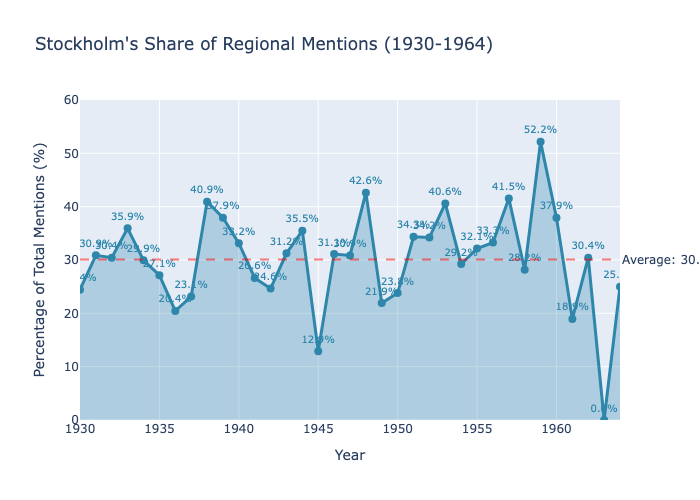

In [43]:
def create_proportion_line_chart(data):
  """
  Plotly line chart showing Stockholm's percentage over time.

  Args:
      data: DataFrame with columns
       [year, region, mentions, total_mentions, percentage]
      OR dict from calculate_proportions with keys
      ['years', 'stockholm_pct', ...]

  Returns:
      plotly.graph_objects.Figure
  """
  # Handle dict vs DataFrame
  if isinstance(data, dict):
    # Dict format from calculate_proportions
    years = data["years"]
    percentages = data["stockholm_pct"]
  elif isinstance(data, pd.DataFrame):
    # Handle different DataFrame formats
    if "region" in data.columns:
      # Format from load_stockholm_data
      stockholm_df = data[data["region"] == "Stockholm"].sort_values(
        "year"
      )
      years = stockholm_df["year"]
      percentages = stockholm_df["percentage"]
    elif "stockholm_pct" in data.columns:
      # DataFrame with stockholm_pct column
      data = (
        data.sort_values("year") if "year" in data.columns else data
      )
      years = data["year"] if "year" in data.columns else data.index
      percentages = data["stockholm_pct"]
    else:
      # Assume Stockholm-only data with year and percentage columns
      data = data.sort_values("year")
      years = data["year"]
      percentages = data["percentage"]
  else:
    raise ValueError("data must be either a dict or pandas DataFrame")

  # Calculate mean percentage
  mean_pct = (
    percentages.mean()
    if hasattr(percentages, "mean")
    else sum(percentages) / len(percentages)
  )

  # Create figure
  fig = go.Figure()

  # Add filled area
  fig.add_trace(
    go.Scatter(
      x=years,
      y=percentages,
      fill="tozeroy",
      fillcolor="rgba(46, 134, 171, 0.3)",
      line=dict(color="#2E86AB", width=3),
      mode="lines+markers+text",
      marker=dict(size=8),
      text=[f"{pct:.1f}%" for pct in percentages],
      textposition="top center",
      textfont=dict(color="#2E86AB", size=10),
      name="Stockholm",
      hovertemplate="Year: %{x}<br>Percentage: %{y:.1f}%<extra></extra>",
    )
  )

  # Add average line
  fig.add_hline(
    y=mean_pct,
    line_dash="dash",
    line_color="red",
    line_width=2,
    opacity=0.5,
    annotation_text=f"Average: {mean_pct:.1f}%",
    annotation_position="right",
  )

  # Update layout
  year_min = int(min(years))
  year_max = int(max(years))
  pct_max = (
    max(percentages)
    if isinstance(percentages, list)
    else percentages.max()
  )

  fig.update_layout(
    title=f"Stockholm's Share of Regional Mentions ({year_min}-{year_max})",
    xaxis_title="Year",
    yaxis_title="Percentage of Total Mentions (%)",
    yaxis=dict(range=[0, pct_max * 1.15]),
    hovermode="x unified",
    showlegend=False,
  )

  if not local:
    return fig

  file = root / "media" / "STHLM-share.png"

  fig.write_image(file)

  return Image(file)


def load_top_n_data(csv_file, start_year=None, end_year=None):
  """
  Load top-N mention data from CSV.

  Returns:
      dict: {year: {location: mentions}}
  """
  data_by_year = defaultdict(lambda: defaultdict(int))

  with open(csv_file, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
      year = int(row["year"])
      if start_year is not None and year < start_year:
        continue
      if end_year is not None and year > end_year:
        continue

      location = row["location"]
      mentions = int(row["mentions"])
      data_by_year[year][location] += mentions

  return data_by_year


def calculate_proportions(data_by_year):
  """
  Calculate Stockholm's proportion and other categories.

  Returns:
      dict: {
          'years': [...],
          'stockholm_pct': [...],
          'stockholm_mentions': [...],
          'other_mentions': [...],
          'total_mentions': [...]
      }
  """
  years = sorted(data_by_year.keys())
  stockholm_pct = []
  stockholm_mentions = []
  other_mentions = []
  total_mentions = []

  for year in years:
    locations = data_by_year[year]
    stockholm = locations.get("Stockholm", 0)
    total = sum(locations.values())
    other = total - stockholm

    stockholm_mentions.append(stockholm)
    other_mentions.append(other)
    total_mentions.append(total)

    if total > 0:
      pct = (stockholm / total) * 100
    else:
      pct = 0

    stockholm_pct.append(pct)

  return {
    "years": years,
    "stockholm_pct": stockholm_pct,
    "stockholm_mentions": stockholm_mentions,
    "other_mentions": other_mentions,
    "total_mentions": total_mentions,
  }


display(
  create_proportion_line_chart(
    calculate_proportions(
      load_top_n_data(
        data / "top10_regions_by_year_1930-1964.csv", 1930, 1964
      )
    ),
  ),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-STHLM-share-*"],
        "type": "image",
        "source": [
          "Stockholm's share of total location mentions "
          "within the Journal Digital Corpus, 1930-1964."
        ],
      },
    }
  },
)

### Gazing on Lappland—from Stockholm

Stockholm’s proportional representation in the SF newsreels is consistently around 30% throughout the 1930s.
Only in 1936 did the representation of Stockholm dip close to 20%, coincidental with the usage of the airplane Sefyr. In order to further investigate the
representation of Sweden in _SF’s Weekly Review_ we looked at the ten most
mentioned regions per year 1933–1939, starting two years before and ending two
years after the beforementioned the introduction of Sefyr.
However, zooming in on the data did not present evidence to link Sefyr to any
representational pattern. It did, however, bring to light another apparent
pattern: how certain peripheral regions were represented, not as ordinary parts
of Sweden, but as exotic and almost foreign. Lappland offered the most vivid
example. Sweden’s largest and northernmost region—historically, also with the
lowest population density—was actually the fifth most mentioned domestic region
in SF newsreels produced in 1935. What brought this remote periphery into such
sudden visibility? The answer was not due to the flying capabilities of Sefyr,
but a broader cultural fascination with the north as a space of leisure and
national renewal. The mere fact that Norrland was mentioned
166 times in the entire corpus is in itself revealing. In contrast Svealand and Götaland, were only mentioned by name twice each
throughout the corpus. It should be noted that the term "Norrland" is nevertheless commonly used as a sweeping
designation that reduces  two-thirds of Sweden’s area—into a single, largely undifferentiated category.

In [ ]:
def create_percentage_stacked_bars(data_by_year, regions):
  """
  Create 100% stacked Plotly bar chart showing distribution.

  Shows top 10 domestic Swedish regions, excluding Foreign.
  Returns a Plotly Figure object.

  Args:
      data_by_year: Dict of {year: {location: mentions}}
      regions: List of all region names

  Returns:
      plotly.graph_objects.Figure
  """
  years = sorted(data_by_year.keys())

  # Filter out "Foreign" from regions
  domestic_regions = [r for r in regions if r != "Foreign"]

  # Build percentage data (calculated from total including Foreign)
  percentages = defaultdict(list)
  for year in years:
    # Calculate total INCLUDING Foreign
    total = sum(data_by_year[year].values())
    for region in regions:  # All regions including Foreign
      mentions = data_by_year[year].get(region, 0)
      pct = (mentions / total * 100) if total > 0 else 0
      percentages[region].append(pct)

  # Use Plotly's built-in color palettes combined for maximum distinguishability
  # Combine multiple qualitative color scales for better differentiation
  all_colors = colors.qualitative.Safe + colors.qualitative.Antique

  # Determine which regions are top 10 in each year
  top10_by_year = {}
  for year in years:
    year_data = {
      region: mentions
      for region, mentions in data_by_year[year].items()
      if region != "Foreign"
    }
    top10_this_year = sorted(
      year_data.items(), key=lambda x: x[1], reverse=True
    )[:10]
    top10_by_year[year] = {region for region, _ in top10_this_year}

  # Get all regions that appear in top 10 at least once
  all_top10_regions = set()
  for regions_set in top10_by_year.values():
    all_top10_regions.update(regions_set)

  # Calculate total mentions for each region across all years for sorting
  region_totals = defaultdict(int)
  for year_data in data_by_year.values():
    for region, mentions in year_data.items():
      if region != "Foreign" and region in all_top10_regions:
        region_totals[region] += mentions

  # Sort regions by total mentions (descending)
  sorted_by_total = sorted(
    region_totals.items(), key=lambda x: x[1], reverse=False
  )

  # Reverse the order so most abundant is at bottom (just below Foreign at top)
  # Stack from bottom to top: least common, ..., 3rd, 2nd, 1st (then Foreign on top)
  ordered_regions = [r for r, _ in reversed(sorted_by_total)]

  # Create figure
  fig = go.Figure()

  # Track cumulative heights for positioning
  cumulative = {year: 0.0 for year in years}
  region_positions = defaultdict(list)

  # Add bars for top 10 regions in custom order
  color_idx = 0
  for region in ordered_regions:
    # For each year, only show bar if region is in top 10 AND >= 0.5%
    visible_percentages = []
    hover_texts = []

    for j, year in enumerate(years):
      pct = percentages[region][j]
      mentions = data_by_year[year].get(region, 0)

      # Get rank for this year
      year_data = {
        r: m for r, m in data_by_year[year].items() if r != "Foreign"
      }
      sorted_regions = sorted(
        year_data.items(), key=lambda x: x[1], reverse=True
      )
      rank = next(
        (
          i + 1
          for i, (r, _) in enumerate(sorted_regions)
          if r == region
        ),
        None,
      )

      if region in top10_by_year[year] and pct >= 0.5:
        visible_percentages.append(pct)
        hover_texts.append(
          f"<b>{rank}. {region}</b><br>"
          f"Percentage: {pct:.1f}%<br>"
          f"Mentions: {mentions}"
        )
      else:
        visible_percentages.append(0)
        hover_texts.append("")

    # Only add trace if region actually appears in the plot
    if max(visible_percentages) > 0:
      # Add bar trace with legend
      fig.add_trace(
        go.Bar(
          name=region,
          x=years,
          y=visible_percentages,
          marker=dict(
            color=all_colors[color_idx % len(all_colors)],
            line=dict(color="white", width=0.5),
          ),
          showlegend=True,
          hovertemplate="%{text}<extra></extra>",
          text=hover_texts,
        )
      )

      # Track positions for reference (not used for labels anymore)
      for j, year in enumerate(years):
        if visible_percentages[j] >= 0.5:
          midpoint = cumulative[year] + (visible_percentages[j] / 2)
          region_positions[region].append(
            (year, midpoint, visible_percentages[j])
          )
          cumulative[year] += visible_percentages[j]
        else:
          region_positions[region].append((year, 0, 0))

      color_idx += 1

  # Add Foreign bar at the top (only if it has visible values)
  if "Foreign" in percentages and max(percentages["Foreign"]) > 0:
    foreign_hover_texts = []
    for j, year in enumerate(years):
      foreign_pct = percentages["Foreign"][j]
      foreign_mentions = data_by_year[year].get("Foreign", 0)
      foreign_hover_texts.append(
        f"<b>Foreign</b><br>"
        f"Percentage: {foreign_pct:.1f}%<br>"
        f"Mentions: {foreign_mentions}"
      )

    fig.add_trace(
      go.Bar(
        name="Foreign",
        x=years,
        y=percentages["Foreign"],
        marker=dict(
          color="#CCCCCC", line=dict(color="white", width=0.5)
        ),
        showlegend=True,
        hovertemplate="%{text}<extra></extra>",
        text=foreign_hover_texts,
      )
    )

  # Add text annotations for total mentions only
  annotations = []

  # Add total mentions at top
  for year in years:
    total_mentions = sum(data_by_year[year].values())
    annotations.append(
      dict(
        x=year,
        y=103,
        text=f"n = {total_mentions}",
        showarrow=False,
        font=dict(size=11, color="black", family="Arial Black"),
        yanchor="bottom",
      )
    )

  # Update layout
  fig.update_layout(
    title=dict(
      text=(
        "Top 10 Domestic Regional Distribution - Percentage Share "
        "(1933-1939)"
      ),
      font=dict(size=18, family="Arial Black"),
    ),
    xaxis=dict(
      title=dict(
        text="Year", font=dict(size=14, family="Arial Black")
      ),
      tickmode="linear",
      dtick=1,
    ),
    yaxis=dict(
      title=dict(
        text="Percentage of Mentions (%)",
        font=dict(size=14, family="Arial Black"),
      ),
      range=[0, 108],
      gridcolor="rgba(128,128,128,0.3)",
    ),
    barmode="stack",
    height=800,
    width=1000,
    annotations=annotations,
    plot_bgcolor="white",
    paper_bgcolor="white",
    margin=dict(t=100, b=150, l=80, r=50),
    legend=dict(
      title=dict(
        text="Region", font=dict(size=12, family="Arial Black")
      ),
      orientation="h",
      yanchor="top",
      y=-0.15,
      xanchor="center",
      x=0.5,
      font=dict(size=10),
      traceorder="normal",
    ),
  )

  if not local:
    return fig

  file = root / "media" / "regions-share.png"

  fig.write_image(file)

  return Image(file)


def load_regional_data_for_viz(csv_path: Path, start_year, end_year):
  """
  Load and prepare regional data for visualization.

  Returns:
      tuple: (data_by_year dict, regions list, df)
      - data_by_year: {year: {region: mentions}}
      - regions: sorted list of all regions
      - df: pandas DataFrame with columns [year, region, mentions]
  """
  data_by_year = load_top_n_data(csv_path, start_year, end_year)

  # Get all regions
  all_regions = set()
  for year_data in data_by_year.values():
    all_regions.update(year_data.keys())
  regions = sorted(all_regions)

  # Create DataFrame for easier manipulation
  rows = []
  for year, region_data in data_by_year.items():
    for region, mentions in region_data.items():
      rows.append(
        {"year": year, "region": region, "mentions": mentions}
      )
  df = pd.DataFrame(rows)

  return data_by_year, regions, df


display(
  create_percentage_stacked_bars(
    *load_regional_data_for_viz(
      data / "top10_regions_by_year_1930-1964.csv", 1930, 1939
    )[:2]
  ),
  width=1000,
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-Regions-share-*"],
        "type": "image",
        "source": [
          "Relative mentions of locations in Swedish regions versus "
          "foreign countries 1933-1939."
        ],
      },
    }
  },
)

Norrland as a filmic other becomes apparent when reading the
transcriptions mentioning Lappland. First mention
occurred in 1930 (SF2789), when the Swedish Prince Wilhelm (1884–1965) read _As the boat
glides_ (_Medan båten glider_), a
self-composed prose poem about the Lapplandian nature. 
In the poem, Lappland is portrayed through a
distinctly romantic lens–an exotic counterpart to modern civilisation.
Prince Wilhelm—later a prolific documentary filmmaker and
director—described the northern nature in colourful terms: mountains,
waterfalls and wildlife. Alongside this sublime treatment of nature, the poem
centres on Gottfrid, a local homesteader, who guides the narrator on fishing
trips. Gottfrid is characterised as a "calm, steady, and honest" man; a
representative of the Norrbottnians’ fine, healthy stock". The last phrase was
not incidental; prince Wilhelm’s language was clearly linked to a broader
discourse of racial vitalism prevalent in 1930s Sweden, in which the rural and
peripheral populations—untouched by urban degeneration—were imagined as
repositories of national vigour. The framing in the newsreels, hence, echoed
contemporary debates around racial biology, which frequently idealised the
Nordic peasant as a biological and moral ideal
<cite id="uwkmb"><a href="#zotero%7C22783102%2FXYQCBCR3">(Broberg and Tydén 2005)</a></cite>.
Furthermore, the poem was read by a prince—a figure of national continuity—lent
these sentiments an authoritative, almost official, character. The wilderness
of Lappland was not merely scenic, but regenerative: a space where the _modern_
Swede might reconnect with ancestral vitality.

In [ ]:
display(
  Image("./media/img13.png", width=800),
  metadata={
    "jdh": {
      "module": "object",
      "object": {
        "tags": ["figure-wilhelm-*"],
        "type": "image",
        "source": [
          "Royalty and exotism—a popular combination. In the film "
          "_As the boat glides_ (_Medan båten glider_) from 1931, "
          "the Swedish Prince Wilhelm read a prose poem celebrating "
          "the Lapplandian nature, or as the subtitle of the film "
          'stated: "an atmospheric image of Lappland\'s sparkling '
          'lakes and miles of desolate forests with their strange '
          'and captivating mystery".'
        ],
      },
    }
  },
)

In 1934 (SF3188), Lappland again appears as an
exotic and curious periphery of Sweden. The journey is framed as an
adventure "towards the North," whilst stressing how accessible it has
become by buses, trains, tourist stations, and experienced "Lapp guides"
("Lappar" is a historically used derogatory term for the Sami; the people
indigenous to the area). The natural environment is again described in an
exotifying sense—"eternal snowdrifts," "wild landscapes," associations with the
tropics at a suspension bridge, the "feeling of superiority when one-eleventh
of Sweden lies at one’s feet"—while at the same time being tamed into a
recreational landscape for hiking, excursions, and having coffee on a veranda
in the midnight sun. The Sami are depicted as a picturesque and reliable
service staff within the tourist infrastructure, like elements of the
scenery in a similar way as the natural landscape 
<cite id="ta378"><a href="#zotero%7C22783102%2FKLXX4FNU">(Nilsson, Rohdin, and Mörkenstam 2024)</a></cite>.

In one example from 1938, about the Swedes’ "industriousness for
generations," the voice-over laments: "From Skåne in the south to Lappland in
the north, our national heritage meets us. We live in the era of industrialism.
Our country can boast a strong, well-organised industry where capable workers
\[...\] understand how to create products of great national economic value
through cooperation" (SF3170A). It is thus evident that
Lappland was regarded as a fully integrated part of the Swedish industrial
economy with strong nationalist overtones. The contrast between these
representations during the 1930s is in many ways striking. In 1930 and
1934–1935, Lappland appeared as a space apart—romantic, exotic, a destination
for leisure and spiritual renewal. By 1938, the same region had been
rhetorically absorbed into the national industrial project, its distinctiveness
flattened into an allegory for Swedish territory as a whole. The shift suggests
two parallel but not incompatible framings: Lappland as an escape from
industrial modernity, and Lappland as proof of industrial modernity’s reach. Tourism and industrialism were thus both
articulations of the same modernisation project evident in _SF’s Weekly
Review_—one offering recovery from its stresses, the other celebrating its
triumphs.

If the peak in interest for Lappland in _SF’s Weekly Review_ stood out in 1935
it was perhaps due to an interest in the leisurely exploitation of the region.
Scalable readings of the newsreel transcriptions, toward a background of
previous historical research, gives evidence on how different geographic areas
were represented. The 1930s was a formative period for mass tourism in Europe,
largely facilitated by rapid infrastructural changes
<cite id="atz0c"><a href="#zotero%7C22783102%2FNEKZIEHT">(Barton 2011)</a></cite>.
By applying scalable reading of the Journal Digital Corpus, we have shown
that this development was reflected in the case of Lappland in Swedish
newsreels from the era. Newsreels mediated tourism not merely as a new
practical possibility, but also as a cultural product of modern progress
itself. Moreover, Sefyr exemplifies another dimension of how Swedish newsreels
mediated modernity to their audiences: the technological conquest of distance,
with the airplane serving as both practical infrastructure and promotional
spectacle. Still, Sefyr’s flights were centripetal—bringing news back to
Stockholm, reinforcing the capital as the hub through which national and
international events were processed and distributed. A second, complementary
dimension of this modern gaze moved in the opposite direction: centrifugal
journeys outward from urban centres into Sweden’s peripheral regions, now made
accessible through the same type of modern infrastructural developments that
made rapid news delivery possible. If Sefyr symbolised the speed with which the
modern press could collapse geographic distance, then the touristic
representation of Lappland illustrated what that collapsed distance made
available—not for journalists, but for ordinary Swedes seeking leisure and
adventure.

## Conclusions

The applications and language models that the datalab at the National Library of Sweden has launched in recent years, have primarily been trained on older, digitized collections of audiovisual material. The various KB-Whisper models, for example, have been developed using some 50,000 hours of Swedish speech data—some of which comes from the digitized Journal Digital film collection. The main reason why the National Library is working with these types of models is that they will (or might) contribute to AI development within the Swedish public sector. Recently, the National Library even received a government mandate, and extra funding, to develop further and more advanced models. It is of course admirable that older moving image heritage data can be used for novel AI development. Moreover, some of these models, and especially AST applications, are naturally also of benefit for heritage institutions, since they can enhance metadata of elderly film or television collections. 

Then again, in this article we have also shown how such models, and AI-powered transmediation of newsreels, can open up new research venues that were previously inaccessible. Even if there are perhaps no particular or specific findings in our article, we have nevertheless demonstrated how signal archaeology and text extraction of intertitles, named entity recognition and geocoding, offer new and fascinating ways to analyse a major film collection at scale. We have converted both film and audio to text, which in addition to making this content humanly readable (as opposed to watchable) also make the Journal Digital collection (re)searchable in an unprecedented way. Text gleaned from newsreel intertitles (or voice-over commentary) does indeed increase the scholarly capacity of such media historical sources. It should also again be stressed that flash intertitles within silent films have for decades been a nuisance for film historians. Through the tool stum this obstacle has at least to some extent been reduced. 

Moreover, we have used voice-over commentary transcribed into texts to create maps of mentioned locations in newsreels, and also shown how this enables a scalable geographical reading. By using a distant reading framework, we have moved from data-driven overviews of geographic frequency, to close readings of individual locations—and back again. This approach has allowed us to chart not only how certain places were made visible—and how often. But also in what narrative contexts they appeared, thereby reconstructing a Swedish cultural landscape formed in part by newsreel depiction, in a manner that would have been prohibitively difficult using qualitative or quantitative methods alone. Similarly, we have added a multimodal object-annotation to 2,319 films, and have shown that what is seen is often not what is heard. By examining the patterns of which object pairs are most often detected together across the Journal Digital collection, we have furthermore examined how a diegetic strategy of newsreels evolved in a non-linear fashion.

The Journal Digital film collection offers a rich, multimodal window into Swedish 20th century history, which requires different angles of approach to be fully explored. We have investigated some of these, processing both audio and film with multiple pipelines. These pipelines are very different in nature, but they have two important elements in common: Firstly, the heavy lifting of these pipelines rely on existing, pre-trained AI-models and tools that were developed for different (and usually contemporary) materials—not old, historical newsreels. Secondly, the outputs from these pipelines require a moderate to a lot of post-processing before they are fit for analyses. It is therefore almost obvious that the code and applications we have developed for this article, have meant that we have critically scrutinised our own algorithmic toolboxes for the study of the past. By enriching films with metadata covering speech, intertitle texts, visible and audible objects, and geographical locations—all time-aligned—we have, finally, been able to breathe life into a collection that has, at least metaphorically, gathered dust within the confines of a digital archive. Within our article we have divided metadata use into three distinct tracks, audio-visual, intertitle-textual, and speech-geographical. As such, we have only explored a fraction of the available combinations of metadata.

# References
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|22783102/YQMWCYSZ"></i>Aftonbladet. 1936a. “Stockholms-Tidningen Enda Tidning i Norden Med Reportage-Flygmaskin.” <i>Aftonbladet</i>, December, 30.</div>
  <div class="csl-entry"><i id="zotero|22783102/ERJVIH9J"></i>———. 1936b. “Stockholms-Tidningen Skrives Av Unga Begåvningar Med Tidens Takt i Blodet!” <i>Aftonbladet</i>, December, 27.</div>
  <div class="csl-entry"><i id="zotero|22783102/928EZRZ4"></i>ALB. 1996. “Ledningsgrupp Minnesanteckningar.”</div>
  <div class="csl-entry"><i id="zotero|22783102/R86YMEXD"></i>———. 1997. “Ledningsgrupp Minnesanteckningar.”</div>
  <div class="csl-entry"><i id="zotero|22783102/M63TBZ7V"></i>———. 1998. “Det Digitala Journalfilmsarkivet, Application.”</div>
  <div class="csl-entry"><i id="zotero|22783102/BXDUCBBT"></i>———. 1999. “IT-Insatser Och Ökad Tillgänglighet.”</div>
  <div class="csl-entry"><i id="zotero|22783102/KADI4AFW"></i>Armaselu, Florentina, and Andreas Fickers, eds. 2024. <i>Zoomland: Exploring Scale in Digital History and Humanities</i>. De Gruyter. <a href="https://www.degruyter.com/document/doi/10.1515/9783111317779/html">https://www.degruyter.com/document/doi/10.1515/9783111317779/html</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/NEKVNJJD"></i>Arnheim, Rudolf. 1957. <i>Film as Art</i>. 2nd ed. Berkeley and Los Angeles: University of California Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/DSU6R48K"></i>Asp, Jon. 2014. <i>Film För Folket: Om Folkets Hus Och Filmen</i>. Stockholm: Premiss.</div>
  <div class="csl-entry"><i id="zotero|22783102/5U2K4DR4"></i>Aspenskog, Robert, and Mathias Johansson. 2025. <i>Modern36/Swescribe: V0.1.0</i>. Zenodo. <a href="https://doi.org/10.5281/ZENODO.15576004">https://doi.org/10.5281/ZENODO.15576004</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/5LZCK9F3"></i>Aspenskog, Robert, Mathias Johansson, and Pelle Snickars. 2025. “Journal Digital Corpus: Swedish Newsreel Transcriptions.” <i>Journal of Open Humanities Data</i> 11 (August): 44. <a href="https://doi.org/10.5334/johd.344">https://doi.org/10.5334/johd.344</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/89SWX3HE"></i>Bain, Max, Jaesung Huh, Tengda Han, and Andrew Zisserman. 2023. “WhisperX: Time-Accurate Speech Transcription of Long-Form Audio.” In <i>INTERSPEECH 2023</i>, 4489–93. ISCA. <a href="https://doi.org/10.21437/Interspeech.2023-78">https://doi.org/10.21437/Interspeech.2023-78</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/2IBV4AM6"></i>Balázs, Béla. 2010. <i>Early Film Theory: Visible Man and The Spirit of Film</i>. Edited by Erica Carter. Translated by Rodney Livingstone. New York and Oxford: Berghahn Books.</div>
  <div class="csl-entry"><i id="zotero|22783102/UVAHYVZ2"></i>———. 2017. <i>Der Sichtbare Mensch Oder Die Kultur Des Films</i>. 5th ed. Frankfurt am Main: Suhrkamp.</div>
  <div class="csl-entry"><i id="zotero|22783102/NEKZIEHT"></i>Barton, Susan. 2011. <i>Working-Class Organisations and Popular Tourism, 1840–1940</i>. Manchester and New York: Manchester University Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/TEPVQNE3"></i>Beck, Jay. 2011. “The Evolution of Sound in Cinema.” In <i>The Routledge Companion to Film History</i>, edited by William Howard Guynn, 1st ed., 64–76. London: Routledge.</div>
  <div class="csl-entry"><i id="zotero|22783102/DW4S37Y5"></i>Bergman, O. 1986. “Hon Ska Göra TV:S Guldgruva Lönsam.” <i>Dagens Nyheter</i>, November.</div>
  <div class="csl-entry"><i id="zotero|22783102/PUAS8ZHL"></i>Bhargav, Samarth, Nanne Van Noord, and Jaap Kamps. 2019. “Deep Learning as a Tool for Early Cinema Analysis.” In <i>Proceedings of the 1st Workshop on Structuring and Understanding of Multimedia heritAge Contents</i>, 61–68. Nice: ACM. <a href="https://doi.org/10.1145/3347317.3357240">https://doi.org/10.1145/3347317.3357240</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/MFU9DVN9"></i>Bradski, Gary. 2000. “The OpenCV Library.” <i>Dr. Dobb’s Journal of Software Tools</i>, no. 120: 122–25.</div>
  <div class="csl-entry"><i id="zotero|22783102/XYQCBCR3"></i>Broberg, Gunnar, and Mattias Tydén. 2005. <i>Oönskade i Folkhemmet: Rashygien Och Sterilisering i Sverige</i>. 2nd ed. Stockholm: Dialogos.</div>
  <div class="csl-entry"><i id="zotero|22783102/6AUNIX6I"></i>Brownell, B. A. 1972. “A Symbol of Modernity: Attitudes Toward the Automobile in Southern Cities in the 1920s.” <i>American Quarterly</i> 24 (1): 20–44. <a href="https://doi.org/10.2307/2711913">https://doi.org/10.2307/2711913</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/685XZA23"></i>Chambers, Ciara, Mats Jönsson, and Roel vande Winkel, eds. 2018. <i>Researching Newsreels: Local, National and Transnational Case Studies</i>. Cham: Palgrave Macmillan.</div>
  <div class="csl-entry"><i id="zotero|22783102/8BSVNXZQ"></i>Chaume, Frederic. 2020. “Dubbing.” In <i>The Palgrave Handbook of Audiovisual Translation and Media Accessibility</i>, edited by Łukasz Bogucki and Mikołaj Deckert, 103–32. Cham: Palgrave Macmillan.</div>
  <div class="csl-entry"><i id="zotero|22783102/NLX2C8VR"></i>Chion, Michel. 1994. <i>Audio-Vision: Sound on Screen</i>. Edited and translated by Claudia Gorbman. New York: Columbia University Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/JSI4ETR6"></i>Dagens Nyheter. 1928. “Tonfilmen Fick En Fin Premiär i Konserthuset.” <i>Dagens Nyheter</i>, October, 21.</div>
  <div class="csl-entry"><i id="zotero|22783102/FDPKQ7P8"></i>Dahlstedt, Stellan. 1947. “Utvidgad Ljudavdelning Vid SF:S Ateljéer i Råsunda.” <i>AGA-Nyheter</i>, no. 1.</div>
  <div class="csl-entry"><i id="zotero|22783102/3TIXWE3B"></i>Dang, Sarah-Mai, Tim Van Der Heijden, and Christian Gosvig Olesen, eds. 2024. <i>Doing Digital Film History: Concepts, Tools, Practices</i>. Berlin: De Gruyter.</div>
  <div class="csl-entry"><i id="zotero|22783102/JQZ27MNN"></i>Dobringer, Anna, Silvester Stöger, and Karl Wratschko. 2013. “Changing Perspectives. DAS EINKÜCHENHAUS as an Example of Film Historiography and Contemporary Restoration.” In <i>Work/s in Progress: Digital Film Restoration within Archives</i>, edited by Kerstin Parth, Oliver Hanley, and Thomas Ballhausen, 121–33. Vienna: Synema.</div>
  <div class="csl-entry"><i id="zotero|22783102/8P2FL3R2"></i>Dupré La Tour, Claire. 2005. “Intertitles and Titles.” In <i>Encyclopedia of Early Cinema</i>, edited by Richard Abel, 326–31.</div>
  <div class="csl-entry"><i id="zotero|22783102/PCBNCFMD"></i>Eisenstein, Sergej, Vsevolod Pudovkin, and Grigori Alexandrov. 1994. “Statement on Sound.” In <i>The Film Factory: Russian and Soviet Cinema in Documents</i>, edited by Richard Taylor, 234. London: Routledge.</div>
  <div class="csl-entry"><i id="zotero|22783102/VL4UHIWF"></i>Eriksson, Maria. 2024. “Zur Bedeutung Des Skalierens Beim Upscaling Digitaler Bilder” 33 (1).</div>
  <div class="csl-entry"><i id="zotero|22783102/2RDITF4M"></i>Eriksson, Maria, Tomas Skotare, and Pelle Snickars. 2022. “Understanding Gardar Sahlberg with Neural Nets: On Algorithmic Reuse of the Swedish SF Archive.” <i>Journal of Scandinavian Cinema</i> 12 (3): 225–47. <a href="https://doi.org/10.1386/jsca_00075_1">https://doi.org/10.1386/jsca_00075_1</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/24HEASLG"></i>———. 2024. “Tracking and Tracing Audiovisual Reuse: Introducing the Video Reuse Detector.” <i>Journal of Digital History</i> 3 (1). <a href="https://doi.org/10.1515/jdh-2024-0009">https://doi.org/10.1515/jdh-2024-0009</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/WEZNWR96"></i>Fickers, Andreas, and Frédéric Clavert. 2021. “On Pyramids, Prisms, and Scalable Reading.” <i>Journal of Digital History</i> 1 (1). <a href="https://doi.org/10.1515/jdh-2021-1008">https://doi.org/10.1515/jdh-2021-1008</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/94IX6F2L"></i>Furhammar, Leif. 2003. <i>Filmen i Sverige: En Historia i Tio Kapitel Och En Fortsättning</i>. 3rd ed. Stockholm: Dialogos i samarbete med Svenska filminstitutet.</div>
  <div class="csl-entry"><i id="zotero|22783102/GVASD2H8"></i>Gaines, J. M. 2024. “The DH Dilemma: Knowing More &#38; Knowing for Sure vs. Never Knowing At All.” In <i>Doing Digital Film History: Concepts, Tools, Practices</i>, edited by Sarah-Mai Dang, Tim Van Der Heijden, and Christian Gosvig Olesen, 17–46. Berlin: De Gruyter.</div>
  <div class="csl-entry"><i id="zotero|22783102/X4KI9JPL"></i>GeoNames. 2025. “GeoNames Geographical Database.” <a href="https://www.geonames.org/">https://www.geonames.org/</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/BY6TRM9R"></i>Gong, Yuan, Yu-An Chung, and James Glass. 2021. “AST: Audio Spectrogram Transformer.” In <i>Interspeech 2021</i>, 571–75. ISCA. <a href="https://doi.org/10.21437/Interspeech.2021-698">https://doi.org/10.21437/Interspeech.2021-698</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/WHSQVQAB"></i>Guyot, Patrice, Thierry Malon, Geoffrey Roman-Jimenez, Sylvie Chambon, Vincent Charvillat, Alain Crouzil, André Péninou, Julien Pinquier, Florence Sèdes, and Christine Sénac. 2019. “Audiovisual Annotation Procedure for Multi-View Field Recordings.” In <i>MultiMedia Modeling</i>, edited by Ioannis Kompatsiaris, Benoit Huet, Vasileios Mezaris, Cathal Gurrin, Wen-Huang Cheng, and Stefanos Vrochidis, 11295:399–410. Cham: Springer International Publishing. <a href="https://doi.org/10.1007/978-3-030-05710-7_33">https://doi.org/10.1007/978-3-030-05710-7_33</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/2X3XHIU7"></i>Habel, Ylva. 2002. <i>Modern Media, Modern Audiences: Mass Media and Social Engineering in the 1930s Swedish Welfare State</i>. Stockholm: Aura.</div>
  <div class="csl-entry"><i id="zotero|22783102/TT5RIEE2"></i>Johansson, Mathias. 2025. <i>Modern36/Stum: V0.2.0</i>. Zenodo. <a href="https://doi.org/10.5281/ZENODO.15582876">https://doi.org/10.5281/ZENODO.15582876</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/PEB6LVXU"></i>Johansson, Mathias, and Robert Aspenskog. 2026. “Geographical Analysis of Journal Digital.” Zenodo. <a href="https://doi.org/10.5281/ZENODO.18131655">https://doi.org/10.5281/ZENODO.18131655</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/I8MEJEFP"></i>Johansson, Mathias, and Johan Malmstedt. 2026. “Audiovisual Analysis of Journal Digital.” Zenodo. <a href="https://doi.org/10.5281/ZENODO.18130784">https://doi.org/10.5281/ZENODO.18130784</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/BPGKCGSS"></i>KB Labb. 2022. “KB/Bert-Base-Swedish-Cased-Ner.” 2022. <a href="https://huggingface.co/KB/bert-base-swedish-cased-ner">https://huggingface.co/KB/bert-base-swedish-cased-ner</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/EVKA7BG8"></i>Korrapati, V. 2025. “Moondream 2 / Moondream: Tiny Vision-Language Model for Object Detection and Vision Tasks.” <a href="https://huggingface.co/moondream">https://huggingface.co/moondream</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/K4N8PIGZ"></i>Malmstedt, Johan. 2025. “Sound Out of Time: Signal Archaeology of Swedish Public Service Radio 1980–1999.” Doctoral dissertation, Umeå: Umeå University. <a href="https://urn.kb.se/resolve?urn=urn:nbn:se:umu:diva-236882">https://urn.kb.se/resolve?urn=urn:nbn:se:umu:diva-236882</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/AGCZGSA8"></i>Malmsten, Martin, Chris Haffenden, and Love Börjeson. 2022. “Hearing Voices at the National Library -- a Speech Corpus and Acoustic Model for the Swedish Language.” arXiv. <a href="https://doi.org/10.48550/ARXIV.2205.03026">https://doi.org/10.48550/ARXIV.2205.03026</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/SSCKKMRE"></i>Moretti, Franco. 2000. “Conjectures on World Literature.” <i>New Left Review</i>, January, 54–68. <a href="https://doi.org/10.64590/hxj">https://doi.org/10.64590/hxj</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/KLXX4FNU"></i>Nilsson, Ragnhild, Mats Rohdin, and Ulf Mörkenstam, eds. 2024. <i>Sápmi På Film Och TV</i>. Umeå: Várdduo, Centrum för samisk forskning.</div>
  <div class="csl-entry"><i id="zotero|22783102/DVKUX2N4"></i>Norrlander, S. 1964. “PM Med Plan Och Instruktion Rörande SF:S Journalarkiv.”</div>
  <div class="csl-entry"><i id="zotero|22783102/UK5SM8C2"></i>Offert, Fabian. 2023. “On the Concept of History (in Foundation Models).” <i>IMAGE. Zeitschrift Für Interdisziplinäre Bildwissenschaft</i> 19 (1): 121–34. <a href="https://doi.org/10.25969/MEDIAREP/22316">https://doi.org/10.25969/MEDIAREP/22316</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/H4XMMWYS"></i>Oiva, Mila, Ksenia Mukhina, Vejune Zemaityte, Andres Karjus, Mikhail Tamm, Tillmann Ohm, Mark Mets, et al. 2024. “A Framework for the Analysis of Historical Newsreels.” <i>Humanities and Social Sciences Communications</i> 11 (1): 1–15. <a href="https://doi.org/10.1057/s41599-024-02886-w">https://doi.org/10.1057/s41599-024-02886-w</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/6APYGVMY"></i>Olsson, Jan. 2022. <i>The Life and Afterlife of Swedish Biograph: From Commercial Circulation to Archival Practices</i>. 1st ed. Madison: University of Wisconsin Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/NTI97CTV"></i>Pronay, Nicholas. 1971. “British Newsreels in the 1930s: Audience and Producers.” <i>History</i> 56 (188): 411–17. <a href="https://doi.org/10.1111/j.1468-229X.1971.tb02124.x">https://doi.org/10.1111/j.1468-229X.1971.tb02124.x</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/WQEJMM77"></i>Reeves, Nicholas. 1986. <i>Official British Film Propaganda During the First World War</i>. London: Croom Helm.</div>
  <div class="csl-entry"><i id="zotero|22783102/HDPCSX8E"></i>Scott, Conner Rivers. 2024. “‘Propaganda for Things as They Are’? British Newsreels in Everyday Life, c.1920-c.1939.” Doctoral dissertation, Sheffield: University of Sheffield. <a href="https://etheses.whiterose.ac.uk/id/eprint/35332/">https://etheses.whiterose.ac.uk/id/eprint/35332/</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/ZWKH378T"></i>Skoglund, Gunnar. 1944. “Om Kortfilm Och Journalreportage.” In <i>Svensk Filmindustri Tjugufem År: En Bok Om Filmproduktion Och Biografrörelse / Utgiven till Jubileet Av Aktiebolaget Svensk Filmindustri</i>, edited by Bengt Idestam-Almquist, 149–60. Stockholm.</div>
  <div class="csl-entry"><i id="zotero|22783102/AZ3BT53M"></i>Smith, Ray. 2007. “An Overview of the Tesseract OCR Engine.” In <i>Ninth International Conference on Document Analysis and Recognition (ICDAR 2007) Vol 2</i>, 629–33. Curitiba, Parana, Brazil: IEEE. <a href="https://doi.org/10.1109/ICDAR.2007.4376991">https://doi.org/10.1109/ICDAR.2007.4376991</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/583554VC"></i>Snickars, Pelle. 2015. “Remarks on a Failed Film Archival Project.” <i>Journal of Scandinavian Cinema</i> 5 (1): 63–67. <a href="https://doi.org/10.1386/jsca.5.1.63_1">https://doi.org/10.1386/jsca.5.1.63_1</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/BNUCIK7T"></i>———. 2024. <i>Audiovisuella Arkiv: En Svensk Mediehistoria 1930–1990</i>. Lund: Mediehistoriskt arkiv.</div>
  <div class="csl-entry"><i id="zotero|22783102/7HB6GAHN"></i>Stjernholm, Emil, Maria Eriksson, and Fredrik Mohammadi Norén. 2025. “On the Historical Gaze of Generative AI: Visions of Scandinavia in Stable Diffusion.” <i>Scandinavian Journal of History</i> 50 (4): 458–88. <a href="https://doi.org/10.1080/03468755.2025.2511644">https://doi.org/10.1080/03468755.2025.2511644</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/BQLCIUEW"></i>Stjernholm, Emil, and Erik Florin Persson. 2019. “Ett Filmbolag i Det Allmännas Tjänst?: Svensk Filmindustri Och Skolfilmens Flytande Gränser.” In <i>Efterkrigstidens Samhällskontakter</i>, edited by Fredrik Norén and Emil Stjernholm, 41–72. Lund: Mediehistoriskt arkiv.</div>
  <div class="csl-entry"><i id="zotero|22783102/TV37XT5P"></i>Stjernholm, Emil, and Pelle Snickars. 2024. “Upscaling Swedish Biograph.” <i>Journal of Scandinavian Cinema</i> 14 (3): 181–97. <a href="https://doi.org/10.1386/jsca_00118_1">https://doi.org/10.1386/jsca_00118_1</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/URY9RMYJ"></i>Thompson, Emily. 2004. <i>The Soundscape of Modernity: Architectural Acoustics and the Culture of Listening in America, 1900–1933</i>. Cambridge: MIT Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/8XFJBPEC"></i>Weitin, Thomas. 2017. “Scalable Reading.” <i>Zeitschrift Für Literaturwissenschaft Und Linguistik</i> 47 (1): 1–6. <a href="https://doi.org/10.1007/s41244-017-0048-4">https://doi.org/10.1007/s41244-017-0048-4</a>.</div>
  <div class="csl-entry"><i id="zotero|22783102/6VFT9YB8"></i>Widenheim, Cecilia, ed. 2002. <i>Utopia &#38; Reality: Modernity in Sweden 1900–1960</i>. New Haven: Yale University Press.</div>
  <div class="csl-entry"><i id="zotero|22783102/DBCYMUBB"></i>Zhou, Xinyu, Cong Yao, He Wen, Yuzhi Wang, Shuchang Zhou, Weiran He, and Jiajun Liang. 2017. “EAST: An Efficient and Accurate Scene Text Detector.” In <i>2017 IEEE Conference on Computer Vision and Pattern Recognition (CVPR)</i>, 5551–60. Honolulu, HI: IEEE. <a href="https://doi.org/10.1109/CVPR.2017.283">https://doi.org/10.1109/CVPR.2017.283</a>.</div>
</div>
<!-- BIBLIOGRAPHY END -->